# Modelagem de Tópicos - Mestrado

## Gustavo Portela Lages

### 1. PLN do Corpus

#### 1.a.Corpus de documentos utilizado na pesquisa:
O Corpus escolhido foi uma coleção de 113 documentos descalssificados presentes em Economic Issues, filtrado pela coleção da National Intelligence Concil (NIC), na seção Freedom of Information Act Electronic Reading Room (FOIA) do site da Central Intelligence Agency (CIA).

Este notebook é baseado em:

1. [notebook do Blog Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)
2. [notebook do Brandon Rose](http://www.brandonrose.org)
3. [publicação Brandon Rose](http://www.brandonrose.org/top100)
4. [artigo do Medium](https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730).

In [1]:
import re
import os
import codecs
import string
import numpy as np
import pandas as pd
import gensim

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import feature_extraction
import mpld3

import pyLDAvis
import pyLDAvis.gensim

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline

datapath = "txt"
outputs = "outputs"

[nltk_data] Downloading package punkt to /home/gu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en
stopwords.extend(['-','','–', 'the', '-\n','would', '’', '”', 's', '0','1','2','3','4','5','6','7','8','9',
                  'expérttp', '://', 'www', 'nnd', 'page', 'page-', 'page-1', 'page-2', 'page-3', 'page-4', 
                  'page-5', 'page-6', 'page-7', 'page-8', 'page-9', 'page-10', '———', 'copy', '—_—7', '¥',
                  '©', 'b/d', 'rrr', 'err', 'errr', 'rr', '—™', '.','__', '--', "'", "',", '°', 'e6', "‘'",
                  ')<',"—'", ])

### 1 - Agrupando documentos

In [3]:
import textract
import os
onlydirs = [f for f in os.listdir('.') if os.path.isdir(os.path.join('.',f)) and not f.startswith('.')]
corpuspath = 'txt'

onlyfiles = [f for f in os.listdir(corpuspath) if os.path.isfile(os.path.join(corpuspath,f)) 
             and not f.startswith('.')]
onlydirs.sort()

lista = []
titles = []
raw_documents = []
raw_texts = ''
for filename in [f for f in onlyfiles if f.endswith('txt')]:
    text = textract.process(os.path.join(corpuspath,filename)).decode('utf-8')
    list_words = text.split()
    list_words = [l.strip().lower() for l in list_words]
    list_words = [l.strip(string.punctuation) for l in list_words]
    list_words = [l for l in list_words if l not in stopwords]
    titulo = filename.split('.')
    titles.append(titulo[0])
    s=''
    for i in list_words:
      s += str(i)+' '
        
    lista +=  [l for l in list_words]
      
    raw_documents.append(s)    
    raw_texts += '\n'+ s
    
    

print(len(lista))    

510871


In [4]:
print(len(raw_documents))
for i in range(5):
  print(raw_documents[i],'\n\n\n\n--------------------\n')

113
im wo stengi”horom ay 2s testimony cia national intelligence council chairman henry rowen senate committee ener natural resources february 18 1983 mr chairman distinguished members committee welcome opportunity present central intelligence agency's views world energy situation implications u aa analysis present oil market situation outlook similar testimony presented department energy believe general cut nominal oil prices highly likely coming weeks persistent softness world oil market growing financial difficulties several oil producers contributing possibility market weakness due number factors economic growth continues weak recovery expected latter half year unseasonably warm weather northern hemisphere held oil energy use sharply normal winter levels consumption lower expected inventories remain surplus company needs adding pressure reduce inventories perception purchases postponed future prices lower conservation substitution away oil continue albeit rates slower past three ye

In [5]:
print("Números de documentos:",len(raw_documents))

Números de documentos: 113


Criaremos um dicionário a partir de uma lista de documentos.

Um dicionário mapeia cada palavra para um número. 

In [6]:
gen_docs = [[w.lower() for w in word_tokenize(text)] for text in raw_documents]

print(gen_docs)

[['im', 'wo', 'stengi', '”', 'horom', 'ay', '2s', 'testimony', 'cia', 'national', 'intelligence', 'council', 'chairman', 'henry', 'rowen', 'senate', 'committee', 'ener', 'natural', 'resources', 'february', '18', '1983', 'mr', 'chairman', 'distinguished', 'members', 'committee', 'welcome', 'opportunity', 'present', 'central', 'intelligence', 'agency', "'s", 'views', 'world', 'energy', 'situation', 'implications', 'u', 'aa', 'analysis', 'present', 'oil', 'market', 'situation', 'outlook', 'similar', 'testimony', 'presented', 'department', 'energy', 'believe', 'general', 'cut', 'nominal', 'oil', 'prices', 'highly', 'likely', 'coming', 'weeks', 'persistent', 'softness', 'world', 'oil', 'market', 'growing', 'financial', 'difficulties', 'several', 'oil', 'producers', 'contributing', 'possibility', 'market', 'weakness', 'due', 'number', 'factors', 'economic', 'growth', 'continues', 'weak', 'recovery', 'expected', 'latter', 'half', 'year', 'unseasonably', 'warm', 'weather', 'northern', 'hemisph

In [7]:
print(len(gen_docs))

113


Criaremos um dicionário a partir de uma lista de documentos.
Um dicionário mapeia cada palavra para um número.

In [8]:
dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary[5])
print(dictionary.token2id['economy'])
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

10
303
Number of words in dictionary: 43397
0 's
1 ,
2 --
3 1.4
4 1.5
5 10
6 10/b
7 17
8 17.2
9 17.5-19
10 18
11 1960s
12 1970
13 1970s
14 1973
15 1979
16 1980
17 1980s
18 1982
19 1983
20 1985
21 1987
22 1990
23 2-4
24 24.6
25 25
26 26
27 27
28 29
29 2s
30 30
31 31
32 37
33 4.7
34 40
35 44
36 44.5-45
37 45
38 48-55
39 50
40 500,000
41 56-57
42 6-7
43 70
44 800,000
45 aa
46 ability
47 abrupt
48 absence
49 abu
50 accelerate
51 access
52 account
53 accounting
54 act
55 action
56 add
57 adding
58 addition
59 additional
60 advantage
61 affect
62 afford
63 african
64 agency
65 agree
66 agreeing
67 agreement
68 aid
69 albeit
70 algeria
71 allies
72 allow
73 almost
74 already
75 also
76 alter
77 alternative
78 alternatively
79 although
80 america
81 amid
82 among
83 ample
84 an-oil
85 analysis
86 anather
87 ancnon
88 animosities
89 annual
90 annually
91 another
92 anticipated
93 anticipation
94 aoa
95 appear
96 appreciably
97 approximate
98 approximates
99 arab
100 arabia
101 arabian
102 argue

1047 2+bhjas
1048 2.0
1049 2.1
1050 2.2
1051 2.3
1052 2.4
1053 2.5
1054 2.6
1055 2.8
1056 2.9
1057 20
1058 21
1059 21.9
1060 22
1061 2288
1062 255
1063 27.5
1064 28a
1065 29.9
1066 2a
1067 2b
1068 2c
1069 3.0
1070 3.1
1071 3.2
1072 3.4
1073 3.7
1074 3.8
1075 3.9
1076 32.1
1077 34.5
1078 3g
1079 3s
1080 4.2
1081 4.4
1082 4.5
1083 4.6
1084 4.8
1085 4.9
1086 5.0
1087 5.1
1088 5.2
1089 5.3
1090 5.7
1091 5.8
1092 6.1
1093 6.2
1094 6.3
1095 6.5
1096 6.6
1097 6.8
1098 60
1099 65-s
1100 65-se9965-72
1101 66
1102 7.1
1103 7.8
1104 7.9
1105 72
1106 75
1107 7a
1108 8-70
1109 8.8
1110 85
1111 88
1112 88-11
1113 8s
1114 9.6
1115 90
1116 9065-72
1117 9d
1118 9ou
1119 9ous
1120 [
1121 a
1122 absolute
1123 according
1124 accuracy
1125 accurate
1126 accurately
1127 achieved
1128 acquiring
1129 across
1130 ad
1131 addl
1132 adequacy
1133 adjusted
1134 advance
1135 ae
1136 aesekb
1137 affected
1138 age
1139 aggregate
1140 agi
1141 aig
1142 ail
1143 ait
1144 ak
1145 allocation
1146 alos
1147 ame
1148 amki

1823 using
1824 ussr
1825 usually
1826 utilize
1827 v
1828 v9
1829 valid
1830 validity
1831 valuation
1832 valuations
1833 values
1834 veg
1835 veols
1836 via
1837 vigorous
1838 voi5
1839 von
1840 vos
1841 vot
1842 vou
1843 vow
1844 vr
1845 vre
1846 vteer
1847 vw
1848 wane
1849 warheads
1850 weapon
1851 weapons
1852 whether
1853 whh
1854 wlec
1855 woagt¢tag
1856 woo
1857 work
1858 wot
1859 wuwdcdl
1860 ww
1861 wx8
1862 x
1863 xaicls
1864 ye
1865 yearly
1866 yn
1867 yy
1868 ze5-e89065-72
1869 ze5-s0965-72
1870 ze6_-ee0065
1871 ¢
1872 ¢gees
1873 £3
1874 £53
1875 £8
1876 §
1877 «
1878 —/e
1879 —65_eg0065
1880 —fes—88-.9065—72
1881 —n65-ge9065-32
1882 —r|t
1883 —s
1884 —secrel
1885 —segref
1886 —segref—
1887 —segret
1888 —¥es—-989065-72
1889 !
1890 #
1891 $
1892 %
1893 (
1894 )
1895 *tofal
1896 -2e
1897 -chiefly
1898 .
1899 .3.316
1900 .and
1901 /2
1902 /8
1903 /se8
1904 0.54
1905 01
1906 02
1907 03
1908 048
1909 06
1910 08
1911 0897uq
1912 09
1913 0s
1914 1
1915 1,001.0
1916 1,0053
1917 1

2653 a2
2654 a3
2655 a4
2656 a5
2657 a6
2658 a7
2659 a8
2660 aaal
2661 ab
2662 aba
2663 abe
2664 abe12
2665 abs
2666 acceptable
2667 accordance
2668 accruing
2669 acquire
2670 actual
2671 ada
2672 additions
2673 adel
2674 administration
2675 administrative
2676 aea/2
2677 aea|2
2678 aec
2679 aef|2
2680 aegis
2681 aes
2682 af
2683 africa
2684 ag
2685 aga
2686 agai
2687 agencies
2688 agflss
2689 aglé
2690 ahr
2691 ahs
2692 ai
2693 aia
2694 ails
2695 air
2696 airfields
2697 airt
2698 air®
2699 ais
2700 ak|2
2701 al
2702 allocated
2703 allocations
2704 allowances
2705 alone
2706 alr
2707 als
2708 amba
2709 amby
2710 amny
2711 amount
2712 amounted
2713 amy
2714 and-local
2715 ane
2716 announced
2717 anvestments
2718 aoe
2719 aon
2720 aot
2721 apa
2722 apam
2723 ape
2724 apel
2725 apem
2726 apg
2727 applicablé
2728 appre
2729 appro
2730 appropriation
2731 appropriations
2732 approval
2733 approved
2734 approx
2735 approximately
2736 apri
2737 april
2738 aq
2739 aram
2740 aran
2741 are
2742 a

3421 m
3422 m10
3423 m16
3424 mamex
3425 marca
3426 marrary
3427 material
3428 maura
3429 mentary
3430 mention
3431 mentioned
3432 met
3433 mili
3434 militarized
3435 militia
3436 millions
3437 mined
3438 ministries
3439 ministry
3440 mirraxy
3441 mirrazy
3442 miscellaneous
3443 mmmasy
3444 mn
3445 mo
3446 modernization
3447 mom
3448 money
3449 month
3450 months
3451 morocco
3452 mos
3453 mosr
3454 most
3455 mostly
3456 mrrmuxr
3457 mrurmazy
3458 ms
3459 murigy
3460 murmazy
3461 murmuey
3462 murrany
3463 murrarr
3464 murrary
3465 murraxy
3466 murray
3467 murrazy
3468 murrey
3469 murrmgy
3470 murugy
3471 muruxy
3472 murxrarr
3473 musrary
3474 musrrazy
3475 muurrazy
3476 mxpena
3477 national.and
3478 naval
3479 navy
3480 navy.engage
3481 ncoweratherr
3482 nent
3483 nes
3484 nesia
3485 nesian
3486 nespefere
3487 nge
3488 nine
3489 no
3490 noggin
3491 non-effective
3492 norway
3493 note
3494 notice
3495 nounced
3496 nta
3497 nz
3498 o/s
3499 o1
3500 o15
3501 o8
3502 ob
3503 obligations
350

4343 comprises
4344 concentrated
4345 conditions—wars
4346 conducting
4347 conference
4348 conferences
4349 confi
4350 confiden
4351 confli
4352 conflicts
4353 conic
4354 consecutive
4355 consolidated
4356 constrained
4357 consumed
4358 containing
4359 contfiict
4360 contin
4361 continent
4362 contingent
4363 continuing
4364 contract
4365 contrib
4366 contribute
4367 contributions
4368 controlled
4369 controt
4370 convoy
4371 convoys
4372 convoysiflights
4373 cooperate
4374 coordi
4375 coordination
4376 coordinator
4377 coordinators
4378 cope
4379 core
4380 corruption
4381 costa
4382 costly—intervention
4383 cot
4384 coun
4385 councils
4386 counter
4387 countri
4388 countries—
4389 countries—meet
4390 countries—uganda
4391 countries—will
4392 countryside
4393 cout
4394 creating
4395 creation
4396 crescent
4397 crime
4398 crises
4399 crises—especially
4400 croat
4401 croatia
4402 croatians
4403 croats
4404 crop
4405 cropland
4406 crops
4407 cross
4408 crossing
4409 crs
4410 crucial
4411

5258 serb-controlled
5259 serbia
5260 serbs
5261 sets
5262 severely
5263 severity
5264 sgefet
5265 shared
5266 shelter
5267 shia
5268 shias
5269 shiasin
5270 shipment
5271 shipments
5272 shirk
5273 shortage
5274 shortages
5275 shortfalls
5276 showing
5277 shu
5278 sicrat
5279 side
5280 sides
5281 sierra
5282 sigh
5283 significant
5284 signing
5285 singapore
5286 sinhalese
5287 sioner
5288 sions
5289 sis
5290 sites
5291 situations
5292 six
5293 skeptical
5294 slated
5295 slight
5296 smti
5297 smuggling
5298 sn
5299 snow
5300 snows
5301 snowy
5302 socfet
5303 societ
5304 societies
5305 socret
5306 soctet
5307 sogcetes
5308 soldiers
5309 somalia
5310 some
5311 sometimes
5312 sons
5313 sont
5314 sor
5315 sorces
5316 soret
5317 sources
5318 southem
5319 southern
5320 southerners
5321 south—now
5322 spark
5323 sparse
5324 spcte
5325 specialized
5326 sperét
5327 sponsored
5328 sporadic
5329 spread
5330 spread-more
5331 spreading
5332 sptret
5333 spéfet
5334 sri
5335 stage
5336 staged
5337 sta

6132 powihle
6133 ppean
6134 ppropriately
6135 practical
6136 prahably
6137 praspect
6138 preaccupied
6139 prede
6140 predecessor
6141 preparation
6142 preparing
6143 prerally
6144 presence
6145 principal
6146 principally
6147 principle
6148 principles
6149 profound
6150 prohlem
6151 proposal
6152 proposals
6153 prosperity
6154 prouress
6155 prove
6156 put
6157 question
6158 quiescent
6159 quo
6160 radical
6161 rally
6162 rapprochement
6163 ray
6164 rays
6165 rdependent
6166 ready
6167 realistic
6168 reapen
6169 reassess
6170 reassessment
6171 rebuilding
6172 reclplents
6173 recognizes
6174 reconciliation
6175 reference
6176 refers
6177 regardless
6178 reject
6179 relating
6180 relations
6181 reliance
6182 relied
6183 remnification
6184 renew
6185 repeated
6186 republic
6187 request
6188 resent
6189 respect
6190 respective
6191 restiveness
6192 restrictions—
6193 retain
6194 retaln
6195 reunification
6196 revitalize
6197 revive
6198 reviving
6199 rifts
6200 rigid
6201 rigidity
6202 rom

7113 backlash
7114 bahamas.the
7115 bank
7116 barbados
7117 barbuda
7118 barr
7119 basing
7120 battal
7121 behavior
7122 behind
7123 beleaguered
7124 beleagured
7125 belize
7126 benign
7127 benin
7128 bermuda
7129 bility
7130 bill
7131 biologic
7132 biological
7133 bisexual
7134 bit
7135 blam
7136 blaming
7137 blood
7138 blood-screening
7139 bloodstream
7140 boiling
7141 bolivia
7142 botswana
7143 breaks
7144 breakthrough
7145 broadcast
7146 brother
7147 bujumbura
7148 bureaucracy
7149 burkina
7150 burundi
7151 businesses
7152 but
7153 bwe
7154 caicos
7155 california
7156 cally
7157 cameroon
7158 campaigns
7159 campaign—like
7160 cancelled
7161 cancers
7162 cape
7163 capitals
7164 captioned
7165 careless
7166 caring
7167 carinii
7168 carriers
7169 cases®
7170 casual
7171 catastrophe
7172 catastrophic
7173 cate
7174 caution—proprietary
7175 cayman
7176 cccccsccssssessssesssssesssuessssessseessreesssecesssessareersase
7177 cccccsssscssssssessssssecesssseesssssees
7178 cco
7179 cdr
7180 c

8025 650
8026 8-e-c
8027 a=rp
8028 abstained
8029 accidental
8030 accompanied
8031 acquiescence
8032 added
8033 adjaccnt
8034 aerp
8035 agreed
8036 alarm
8037 altering
8038 alternate
8039 ammunition
8040 ang
8041 announcement
8042 anti
8043 anti-commnist
8044 ané
8045 apprehension
8046 arces
8047 areep
8048 arguing
8049 arvn
8050 assassination
8051 assaults
8052 assurances
8053 aséistant
8054 ations
8055 atmosphere
8056 attacked
8057 augmenting
8058 avoidence
8059 az
8060 bang
8061 bap
8062 basically
8063 bayard
8064 beach
8065 beeep
8066 beep
8067 beer
8068 belicve
8069 believes
8070 betep
8071 better
8072 bleed
8073 boarc
8074 bombing
8075 bonbing
8076 bowe
8077 bridge
8078 bsc
8079 cai
8080 call
8081 cam
8082 canal
8083 canoda
8084 canton
8085 cao
8086 capacities
8087 cargo
8088 cargo-handling
8089 cargoes
8090 cars
8091 cau
8092 ccmmunist
8093 challenge
8094 chinese
8095 chiza
8096 claire
8097 classification
8098 coasts
8099 cold-war
8100 collective
8101 commnist
8102 commnists
810

8895 forward
8896 fostering
8897 foundation
8898 four-year
8899 frag
8900 fragmen
8901 frame
8902 fraud
8903 freed
8904 freedoms
8905 ful
8906 fulfill
8907 functioning
8908 fusion
8909 g.1lc
8910 g6.1lc
8911 gained
8912 gay
8913 gaydar
8914 gdp
8915 generating
8916 genuine
8917 gional
8918 glue
8919 gorbachev
8920 governability
8921 governed
8922 government_embodying
8923 granting
8924 grounds
8925 groundwork
8926 guerilla
8927 guidelines
8928 harmful
8929 has—often
8930 histo
8931 homogeneous
8932 hopeful
8933 hos
8934 hyperinflation
8935 ial
8936 identical
8937 identification
8938 identity—which
8939 ignore
8940 ignores
8941 ime
8942 imf
8943 immuni
8944 impacting
8945 imperatives
8946 imperialist
8947 implement
8948 imposing
8949 imposition
8950 impossible
8951 impressed
8952 improving
8953 impulses
8954 inal
8955 inclina
8956 inclination
8957 incumbent
8958 indicators
8959 individualism
8960 industry—which
8961 inertia
8962 inevitable
8963 inflating
8964 inflationary
8965 ingredien

9876 non-indonosians
9877 non-observ
9878 nopula
9879 nore
9880 nost
9881 notherlands
9882 notherlends
9883 nothorlands
9884 nove
9885 novenber
9886 novenbor
9887 nowly-cstablished
9888 nuncrous
9889 nutual
9890 observing
9891 obstacle
9892 occording
9893 ogfhs
9894 ombrace
9895 onbodied
9896 onisns
9897 ont
9898 ontire
9899 opinions
9900 opposed
9901 orderly
9902 ordor
9903 oreos
9904 orgeniza
9905 orgenizetion
9906 orgenizing
9907 orgens
9908 orgénization
9909 oricntal
9910 orld
9911 othervisc
9912 othor
9913 outer
9914 outlying
9915 ovm
9916 ovorscas
9917 owner
9918 owners
9919 ownod
9920 oxercising
9921 page-40
9922 page-41
9923 page-42
9924 page-43
9925 page-44
9926 page-45
9927 page-46
9928 page-47
9929 page-48
9930 page-49
9931 page-50
9932 page-51
9933 pang
9934 parliaments
9935 parlianents
9936 particination
9937 partnership
9938 pasar
9939 pasoendan
9940 pendence
9941 pendent
9942 pending
9943 penetrate
9944 peovles
9945 perlianent
9946 pinang
9947 placements
9948 plen
9949 p

10734 reinforced
10735 reinforcement
10736 requirement
10737 requisite
10738 reservations
10739 respon
10740 rests
10741 resumption
10742 resupply
10743 revelation
10744 revitalization
10745 risking
10746 rocket
10747 ros
10748 rota
10749 rounded
10750 rulgaria
10751 s0,0w
10752 saadonnsegq
10753 samlnnoo
10754 sapnyouy
10755 sarinaitag
10756 satisfy
10757 sc*
10758 sce
10759 science
10760 sciences
10761 scme
10762 sea-river
10763 seabed
10764 seabome
10765 seaborne
10766 seacnect
10767 sealab
10768 sealift
10769 sealing
10770 seapower
10771 seas
10772 sector—
10773 sefe
10774 seffer
10775 seffx
10776 segfer
10777 segftr
10778 self-imposed
10779 self-sufficient
10780 sem
10781 senesguaaqnug
10782 sensors
10783 seqgret
10784 seqret
10785 servicing
10786 seventeen
10787 seventh
10788 sfc
10789 sft
10790 sfx
10791 sgaupagng
10792 sgfer
10793 sha
10794 shelf
10795 shifted
10796 ship-borne
10797 shipbuilding
10798 shipowners
10799 shippers
10800 shipyard
10801 shipyards
10802 shore-based
10

11599 94.36
11600 946
11601 959
11602 96
11603 98,597
11604 9888
11605 99.5
11606 9977
11607 a/c
11608 aaog-
11609 aay
11610 abil
11611 above-mentioned
11612 absorbs
11613 absten
11614 acapulco
11615 acapulco-puebla-tampico
11616 accede
11617 accessories
11618 accessory
11619 accident
11620 accommodate
11621 accomp
11622 accomplished
11623 acp
11624 acre
11625 acropostal
11626 acrotaxi
11627 activi
11628 adaa
11629 adams
11630 adapted
11631 adca-wpnusag
11632 addi
11633 addy
11634 adhemar
11635 adhered
11636 adhering
11637 admin
11638 administer
11639 administra
11640 administrators
11641 admits
11642 admittedly
11643 advise
11644 advised
11645 advises
11646 advisory
11647 advo
11648 advocated
11649 aefner
11650 aerea
11651 aereas
11652 aereo
11653 aereos
11654 aerial
11655 aero
11656 aero-transportes
11657 aerocomercial
11658 aerodynamics
11659 aerolineas
11660 aeronau
11661 aeronautica
11662 aeronautical
11663 aeronautico
11664 aeronautics
11665 aeronautics—respon
11666 aeronaves
116

12514 florianopolis
12515 florida
12516 flourishing
12517 fly
12518 flyers
12519 flying
12520 flys
12521 focke-wulf
12522 foe
12523 fol
12524 foothills
12525 footing
12526 forcement
12527 forcing
12528 ford
12529 foreign-flag
12530 foreign-owned
12531 foreséeable
12532 formally
12533 formerly
12534 formu
12535 formulates
12536 formulating
12537 fortaleza
12538 forty-three
12539 founder
12540 four-engine
12541 franchise
12542 freedom.of
12543 freqeuntly
12544 frequencies
12545 frequency
12546 friend
12547 from
12548 frtation
12549 fruitless
12550 fu
12551 fulfilled
12552 full-fledged
12553 full-scale
12554 func
12555 functioned
12556 fundacion
12557 f—
12558 g-
12559 galeao
12560 gales
12561 gallegos
12562 galpa
12563 gan
12564 ganization
12565 ganized
12566 garde
12567 garded
12568 gateway
12569 gateways
12570 gation
12571 gaucha
12572 gecret
12573 gegt
12574 gency
12575 generale
12576 generous
12577 generously
12578 gentina
12579 gentinas
12580 gentine
12581 george
12582 gerais
12583 

13395 piracy
13396 pl
13397 plagued
13398 plane
13399 planes
13400 plantation
13401 plastica
13402 plata
13403 plication
13404 plications
13405 plied
13406 ployees
13407 pluna
13408 policy.
13409 polytechnic
13410 ponents
13411 pooling
13412 popularly
13413 populated
13414 por
13415 poration
13416 port-au
13417 port-au-prince
13418 port-of
13419 port-of-spain
13420 portant
13421 portation
13422 porters
13423 portes
13424 porto
13425 posal
13426 possessions
13427 postal
13428 posts
13429 potosi
13430 pprojects
13431 prac
13432 practically
13433 practice
13434 practiced
13435 preceded
13436 precedent
13437 predetermined
13438 predictions
13439 predominantly
13440 preferable
13441 preferably
13442 preference
13443 preferred
13444 prepare
13445 prerequisite
13446 presumably
13447 pretext
13448 prevailed
13449 prevalent
13450 primeras
13451 prin
13452 prince
13453 prio
13454 prise
13455 prises
13456 prising
13457 priv
13458 privately-owned
13459 privi
13460 proceeding
13461 proceedings
1346

14371 adayeach
14372 adminis
14373 adriatic
14374 aggravated
14375 aggression
14376 agrees
14377 albern
14378 alexandroupolis
14379 alexsandre
14380 all-steel
14381 alluvial
14382 amended
14383 ams
14384 an
14385 angern
14386 anti-communists
14387 apartment
14388 apatin—
14389 apf
14390 appealed
14391 appendices
14392 arbitrarily
14393 arduous
14394 armee
14395 armistice
14396 arpad
14397 artery
14398 artificially
14399 ascertain
14400 assertion
14401 asset
14402 attend
14403 austrian
14404 austrians
14405 automobile
14406 baja
14407 balaton
14408 balkan
14409 balkans
14410 banatska
14411 barges
14412 barred
14413 barrier
14414 bars
14415 basins
14416 batina
14417 bauxite-producing
14418 bazias
14419 bearing
14420 becej
14421 becka
14422 belgrade
14423 belonging
14424 bessarabia
14425 bessarabian
14426 bezdan
14427 blast
14428 blueprints
14429 booty
14430 bottleneck
14431 bottom
14432 braila
14433 bratis
14434 bratislava
14435 bratislava-komarno
14436 bre
14437 breakwater
14438 breakwa

15276 evzen
15277 existed
15278 expelled
15279 exploiration
15280 expounding
15281 eyes
15282 faithful
15283 faline
15284 fascism
15285 fate
15286 federa
15287 fgtb
15288 fifteen-nation
15289 finet
15290 foilowing
15291 followers
15292 formality
15293 forum
15294 frachon
15295 fraction
15296 frapport
15297 fstp
15298 fundamentally
15299 furriers
15300 furthering
15301 galvanizing
15302 ganda
15303 gaston
15304 georges
15305 gheorghe
15306 gilbert
15307 giordiano
15308 giuseppe
15309 goodwin
15310 governs
15311 graded
15312 gsee
15313 gudmundsson
15314 habitually
15315 haj
15316 hassem
15317 heterogeneous
15318 hheras
15319 hill
15320 hillman
15321 histadruth
15322 housecleaning
15323 huunonen
15324 i-1
15325 ictu
15326 iftu
15327 ii-3
15328 il-1
15329 illiteracy
15330 ilo
15331 impartial
15332 implicit
15333 ination
15334 incorporation
15335 indecision
15336 indus
15337 industrially
15338 ineffective
15339 inevitably
15340 intact
15341 intermediary
15342 internationals
15343 interzonal

16149 guilty
16150 gustemala
16151 gwatemalan
16152 gypncty
16153 half-measures
16154 handicap
16155 harassing
16156 hat
16157 heli
16158 helicopters—most
16159 hermandez—a
16160 hierarchy
16161 highlands—have
16162 hkely
16163 honest
16164 hon—the
16165 hood
16166 hu
16167 i9a9
16168 icant
16169 imbalances
16170 in_half
16171 inci
16172 incursions
16173 index
16174 indian-popu
16175 indians
16176 indicat
16177 inefficient
16178 infla
16179 inherits
16180 installation
16181 insur
16182 insurgen
16183 insurgent
16184 inten
16185 intent
16186 interfere
16187 intrusion
16188 ious
16189 isrzel
16190 is—and
16191 jets
16192 jorge
16193 junior
16194 ke
16195 killed
16196 lac
16197 larization
16198 leftists
16199 leftwing
16200 lesson
16201 liberated
16202 lieutenants
16203 likeli
16204 longstand
16205 lucas
16206 manageable
16207 marshal
16208 mbmpbmwissue
16209 mechanism
16210 meiia
16211 meijia—relies
16212 mejia
16213 miala
16214 military—could
16215 milttory
16216 miscalculations—particu

17106 displays
17107 dji
17108 docking
17109 dolicy
17110 dragmatic
17111 drawn-out
17112 dressures
17113 drices
17114 driving
17115 drogressively
17116 dromote
17117 dual
17118 duct
17119 eedential—ahich
17120 encircle
17121 encirclement
17122 encouroge
17123 engenders
17124 ening
17125 enlarge
17126 enor
17127 entarge
17128 entertained
17129 ents
17130 era—military
17131 eredit
17132 escalate
17133 eth
17134 ethi
17135 ethiopian
17136 eu
17137 eventuality—
17138 evints
17139 exacerbate
17140 exam
17141 expansionist
17142 experimentation
17143 explores
17144 extréme
17145 facet
17146 facilitat
17147 fails—and
17148 failures
17149 fecognize
17150 fects
17151 fend
17152 fers
17153 festering
17154 fev
17155 fitfully—the
17156 flected
17157 flection
17158 fn
17159 focuses
17160 follow-on
17161 follow-én
17162 force—to
17163 forestalling
17164 forts
17165 forwardic
17166 frontation
17167 front—soviet
17168 fundamentalism
17169 generational
17170 geography
17171 geopolitical
17172 geron
171

18024 eiroumstences
18025 ekillful
18026 elaoet
18027 elo
18028 elready
18029 emphasised
18030 enbanee
18031 encbeble
18032 enersetic
18033 enst-west
18034 enti-colonial
18035 eobeston
18036 eountries
18037 epiangered
18038 epprebenaions
18039 esmaign
18040 estimte
18041 estimts
18042 estizate
18043 ettacky
18044 ettaining
18045 ettitaie
18046 europeen
18047 evaileble
18048 expanied
18049 expant
18050 expension
18051 exphasis
18052 ext
18053 extremly
18054 extrenism
18055 extrensly
18056 exttlement
18057 faprove
18058 fart
18059 favoruble
18060 fayroved
18061 fearmament
18062 fecing
18063 feneved
18064 fesolve
18065 festroy
18066 fesumption
18067 focreases
18068 folloved
18069 for-sortear-werfere-an-the
18070 foreed
18071 foresse
18072 forwlation
18073 fowers
18074 fperw
18075 frasés
18076 freedon
18077 fregch
18078 frenchy
18079 freoch
18080 frobably
18081 frobamiz
18082 frogreas
18083 frome
18084 frou
18085 fuce
18086 fukistan
18087 gail
18088 ganger
18089 gard
18090 garman
18091 gen

18899 nal
18900 nancing
18901 nario
18902 necds
18903 necessary—that
18904 negatively—by
18905 neves
18906 ney
18907 ninue
18908 nity
18909 non-us
18910 nonaccrual
18911 nonperforming
18912 oct
18913 opt
18914 organizing
18915 ortho
18916 outflows
18917 over
18918 overvalued
18919 package
18920 packages
18921 packaze
18922 parties—the
18923 pathy
18924 payment
18925 payments—is
18926 pds
18927 pdt
18928 pegged
18929 penchant
18930 percent—just
18931 perfor
18932 performances
18933 perpetrated
18934 perspectives
18935 pfl
18936 phasing
18937 philir
18938 picked
18939 pine
18940 plan—
18941 pledge
18942 pmdb
18943 pmy
18944 pocties
18945 politician
18946 populace
18947 positioning
18948 precedent-setting
18949 preferring
18950 president-elect
18951 press—to
18952 private-sector
18953 problom
18954 profile
18955 proliferate
18956 propound
18957 protege
18958 pst
18959 pt
18960 public-sector
18961 py
18962 quarterly
18963 quietly
18964 radicat
18965 raging
18966 rarily
18967 raultilateral


19857 threefold
19858 throughput
19859 thumbnail
19860 tightening
19861 tighter
19862 titanium
19863 toads
19864 tool
19865 top-priority
19866 tota
19867 to—military
19868 trac
19869 trad
19870 trains
19871 trans-medi
19872 trans-sahara
19873 transatlantic
19874 transformers
19875 transporters
19876 traqs
19877 trees
19878 tributes
19879 troll
19880 tromsa
19881 tronics
19882 truculent
19883 trunklines
19884 ttaly
19885 tubing
19886 tubular
19887 tung
19888 tungsten-alloy
19889 tungsten-based
19890 tura
19891 turbine
19892 turbine-compressors
19893 turbines
19894 turbodrills
19895 turnkey
19896 u1
19897 ule
19898 unattractive
19899 undergoing
19900 underuti
19901 unexplored
19902 unsuited
19903 unused
19904 unwelcome
19905 upgrade
19906 urals
19907 urengoy
19908 urengoy-uzhgorod
19909 us-origin
19910 ussr—the
19911 ute
19912 vacuum-are
19913 valves
19914 vaz
19915 vehi
19916 vite
19917 volga-urals
19918 wedging
19919 wegian
19920 weighed
19921 welders
19922 welding
19923 well-logging
1

20807 yowsy
20808 yvd
20809 yvin
20810 zamnbiy
20811 zyel
20812 1086
20813 40-man
20814 855
20815 aad
20816 alll
20817 alo
20818 arty
20819 asaex
20820 atilirated
20821 bam
20822 candidgtes
20823 chileanend
20824 commanders
20825 contine
20826 coptured
20827 counterinsursency
20828 cubs
20829 custemalans
20830 cwr
20831 dese
20832 eatreme
20833 edition
20834 edly
20835 enimate
20836 eppened
20837 erage
20838 evailalde
20839 fabsi
20840 femur
20841 financlil
20842 fof
20843 foretas
20844 fps
20845 guatemilan
20846 guaternalar
20847 guerrilla-training
20848 guert
20849 hall
20850 harms
20851 he
20852 hutructors
20853 ied
20854 ind
20855 infiltea
20856 intethernre
20857 intettizence
20858 intg
20859 iroops
20860 itlon
20861 jeft
20862 jen
20863 kn
20864 limted
20865 lnteltigeace
20866 materiel
20867 math
20868 meaky
20869 natoaal
20870 netiunal
20871 nicararus
20872 nsfers
20873 orpa
20874 passports
20875 pct/o
20876 peeperstion
20877 pgt/o
20878 plaming
20879 platoons
20880 pod
20881 ref

21743 rhe
21744 rily
21745 ruinania
21746 safely
21747 salable
21748 scarcely
21749 self-preservation
21750 sharpened
21751 shocks
21752 siders
21753 sixties
21754 slovaks
21755 slowness
21756 soft.
21757 sophistication
21758 spy
21759 staffs
21760 staging
21761 stagnated
21762 stigma
21763 strove
21764 supervising
21765 swayed
21766 sécurity
21767 thoughts
21768 tied
21769 tionalism
21770 tolerate
21771 toleration
21772 tosy
21773 transgressed
21774 transylvania
21775 tutelage
21776 underestimated
21777 uneven
21778 unfold
21779 up-to-date
21780 upheavals
21781 upsetting
21782 ussi
21783 ventures
21784 vitality
21785 voiced
21786 wholehearted
21787 yugov
21788 zhivkov
21789 1-16-88
21790 1/1
21791 11-14-88
21792 11-16-88
21793 11-23-68
21794 11-23-88
21795 11-3/8-88
21796 11-4-89
21797 11/12-9-88
21798 12.68
21799 12.8
21800 1268
21801 1288
21802 12th
21803 1319879
21804 13th
21805 1920s
21806 1956-60
21807 1956-87
21808 1965-70
21809 197075
21810 1971-75
21811 1976-82
21812 1976-82—t

22705 4.265
22706 415
22707 427
22708 429
22709 43,790
22710 430
22711 4307
22712 4461
22713 465
22714 478
22715 4867
22716 4945
22717 4969
22718 4nd
22719 4—the-title-ot
22720 5,665
22721 5,800
22722 5,965
22723 50-100
22724 50-110
22725 50-140
22726 500-1,000
22727 500-man
22728 51s
22729 52,890
22730 543
22731 554
22732 565
22733 6,131
22734 6,550
22735 6,836
22736 60-70
22737 614
22738 624
22739 630
22740 6533
22741 655
22742 659
22743 665
22744 691
22745 692
22746 6s
22747 6th
22748 7,285
22749 7,560
22750 7,700
22751 7,800
22752 722
22753 725
22754 730
22755 760-870
22756 795
22757 8,300
22758 8,600
22759 800-1,000
22760 800-1,100
22761 81644809104
22762 820
22763 826
22764 839
22765 85,000
22766 85-mm
22767 850
22768 857
22769 869
22770 870
22771 872
22772 873
22773 878
22774 885
22775 9,00
22776 9,270
22777 913
22778 926
22779 990
22780 abandons
22781 abortive
22782 above-projected
22783 abrogated
22784 abrogates
22785 accasionally
22786 accompanies
22787 accompaniment
22788 ac

23307 iraq—and
23308 is.crucial
23309 iss
23310 issas
23311 ivan
23312 jam
23313 jan-1
23314 jan-feb
23315 jiiiea
23316 jiiiga
23317 jijiga
23318 jon
23319 jonavacteaining
23320 joules
23321 jovements
23322 judg
23323 jul-aug
23324 jun-jul
23325 kaliningrad
23326 kam
23327 kamchatka
23328 kampuchea
23329 kast
23330 kaunas
23331 kebir
23332 keivoy
23333 kgb
23334 khormaksar
23335 kiev-class
23336 kim
23337 kocher
23338 kola
23339 kuril
23340 l-38
23341 l-76
23342 l.-62
23343 l908
23344 labeled
23345 lacerda
23346 ladder
23347 land-based
23348 landings
23349 launcher
23350 launchers—
23351 leaders—including
23352 left-hand
23353 leftist-dominated
23354 lengths
23355 lery
23356 lia
23357 liber
23358 libyans
23359 libya—the
23360 lifts
23361 liniited
23362 lisbon-angolaa
23363 littke
23364 lnterdiction
23365 loads
23366 lobito
23367 loca
23368 logistical
23369 logistically
23370 logistical—not
23371 long-distance
23372 looks
23373 loscow
23374 low-key
23375 luanda
23376 lubange
23377 luban

24177 radicalization
24178 rare
24179 reclamation
24180 rected
24181 religions
24182 responds
24183 revolves
24184 rocco
24185 rufus
24186 rumors
24187 sake
24188 sc
24189 secret—
24190 seeret—
24191 seneral
24192 ships—6
24193 shld
24194 sirte
24195 snaintained
24196 someday
24197 sort—political
24198 sources—tourism
24199 soviet-albanian
24200 soyiet
24201 sseere
24202 stockpiled
24203 struments
24204 subversively
24205 surface-t
24206 surface-to-surface
24207 sutive
24208 tacked
24209 tacking
24210 taylor
24211 tec
24212 tegimes
24213 temperature
24214 tenes
24215 tides
24216 tinea
24217 tolerates
24218 tra
24219 tug—were
24220 tunisian
24221 tunities
24222 underlie
24223 unevenly
24224 unfriendly
24225 uninterested
24226 vlone
24227 volvement
24228 wb
24229 westem
24230 william
24231 ysib
24232 §rowing
24233 —seeref
24234 0o
24235 2252-81948
24236 42-4
24237 6-48
24238 adept
24239 admittance
24240 ad¥ocacy
24241 algiers
24242 alps
24243 bari
24244 bewildered
24245 bidding
24246 bit

25047 evacuation
25048 examinations
25049 existe
25050 experimenting
25051 extragovernmental
25052 factured
25053 faculty
25054 farsighted
25055 favoritism
25056 fire-fighting
25057 flight-for-flight
25058 flota
25059 flyable
25060 forces—which
25061 foregone
25062 foreword
25063 frames
25064 front-line
25065 frunze
25066 geared
25067 gle
25068 glev
25069 gliders
25070 gorki
25071 government-sponsored
25072 graduates
25073 grazhdanskovo
25074 guias
25075 guiding
25076 gunnery
25077 gut
25078 gvf
25079 hampere
25080 high-speed
25081 hk
25082 honestly
25083 il-10
25084 il-12
25085 il-18
25086 illicit
25087 ilyushin
25088 impartially
25089 implied
25090 impris
25091 imprisonment
25092 inall
25093 inapplicable
25094 inefficiency
25095 ini
25096 inspect
25097 inspected
25098 inspection—al
25099 inspection—tin
25100 inspection—to
25101 inspectorate
25102 intendance
25103 interflight
25104 interned
25105 interservice
25106 inventions
25107 issyk-kul
25108 isters
25109 its-title
25110 izvestiy

25897 izhayaya
25898 joni
25899 journals
25900 jumps
25901 kactors
25902 kansk
25903 kansk-achinsk
25904 keyed
25905 kia
25906 kilocalories
25907 kino
25908 kuznetsk
25909 labor-saving
25910 las
25911 ldcs
25912 leadtime
25913 lech
25914 less.than.1
25915 levis
25916 liveries
25917 low-quality
25918 lubricants
25919 mamontovo
25920 meditecranean
25921 medium-sized
25922 megawatts
25923 methane
25924 midpoint
25925 midrange
25926 milfion
25927 military-industrial
25928 miner
25929 misjudging
25930 mlustrative
25931 moded
25932 monitored
25933 munity—in
25934 nawealgas
25935 near-arctic
25936 near-stagnant
25937 negl—may
25938 negu
25939 nental
25940 new.areas
25941 non-west
25942 nonenerey
25943 nonenergy
25944 northerly
25945 now.taking
25946 nucle
25947 nuclear/hydro
25948 occa
25949 ofd
25950 offsets
25951 oi
25952 oil-bearing
25953 oil-in
25954 oit
25955 oll
25956 open-cast
25957 outside.the
25958 overdue
25959 overestimate
25960 overestimaté
25961 pau
25962 petrochemicals
25963 pip

26876 36,563
26877 36,953
26878 36.0
26879 366
26880 3688
26881 37,000
26882 371.0
26883 3771
26884 378
26885 379.3
26886 38,072
26887 38,838
26888 38.6
26889 38000
26890 382
26891 3824265823
26892 39,045
26893 39,230
26894 39,282
26895 39.0
26896 39.5
26897 390
26898 392
26899 392,544
26900 394
26901 394°
26902 398
26903 4,064
26904 4,110
26905 4,120
26906 4,128
26907 4,130
26908 4,145
26909 4,165
26910 4,200
26911 4,215
26912 4,230
26913 4,250
26914 4,255
26915 4,266
26916 4,330
26917 4,369
26918 4,391
26919 4,400
26920 4,413
26921 4,455
26922 4,520
26923 4,539
26924 4,705
26925 4,777
26926 4,785
26927 4,794
26928 4,826
26929 4,848
26930 4,855
26931 4,890
26932 4,917
26933 4,966
26934 4,970
26935 4,986
26936 4,990
26937 4.572
26938 4.775
26939 4.855
26940 4.870
26941 4.—
26942 40,700
26943 40.7
26944 402
26945 403,418
26946 40343083352
26947 404
26948 407
26949 408
26950 409
26951 41,755
26952 4108.2
26953 411
26954 4118743492
26955 412,528
26956 4127
26957 4152
26958 41593
26959 418

27831 all-korea
27832 ambassa
27833 anti-japanese
27834 antistate
27835 arrested
27836 arresting
27837 asepunog
27838 atmos
27839 attack/fighter
27840 blending
27841 blunted
27842 blurring
27843 brittle
27844 cantly
27845 celebration
27846 chong-hui
27847 chong-pil
27848 cincunc
27849 cipline
27850 ciplined
27851 clique
27852 close-support
27853 closes
27854 cloudy
27855 coking
27856 colonels
27857 comprehen
27858 consciously
27859 consulates
27860 consumer-first
27861 counterintelligence
27862 curfews
27863 demili
27864 demilitarized
27865 desirability
27866 deteriorat
27867 differed
27868 disenchantment
27869 disgust
27870 dispatched
27871 dissimilarities
27872 distin
27873 dors
27874 dustries
27875 enormously
27876 enroll
27877 entanglements
27878 entice
27879 enticements
27880 envied
27881 envoy
27882 erals
27883 ested
27884 etat
27885 evasion
27886 ex-military
27887 ex-premier
27888 exile
27889 f-86
27890 federal'bureau
27891 female
27892 fide
27893 fist
27894 flourished
27895 fom

28682 sauci
28683 scld
28684 sct
28685 secondarily
28686 sentinent
28687 sevens
28688 shaikh
28689 shareholdings
28690 shutdown
28691 shutdowns
28692 sienificantly
28693 siternate
28694 sixty-one
28695 socony
28696 solar
28697 sooll
28698 soudi
28699 squandering
28700 sralier
28701 stancare
28702 steacily
28703 stendard
28704 stirrings
28705 strongis
28706 substantisily
28707 successese
28708 sueh
28709 sujj-ort
28710 sumopeon
28711 sutch/shell
28712 syriae
28713 tamination
28714 tapline
28715 tariki
28716 tative
28717 tc
28718 tegrated
28719 texaco
28720 thrcugh
28721 ticewater
28722 totel
28723 trace
28724 tracing
28725 tremencous
28726 trensit
28727 twentieth
28728 tyne
28729 uae
28730 unblocked
28731 unciassifien
28732 underrate
28733 undiviced
28734 unjust
28735 uplikely
28736 upset
28737 ureats
28738 usurping
28739 v/a
28740 velopments
28741 vestments
28742 volune
28743 weasures
28744 welcomed
28745 well-informed
28746 woncers
28747 worid
28748 worla
28749 xe
28750 yeors
28751 yw

29636 277.0
29637 27t9
29638 28,937
29639 29,794
29640 290.0
29641 294,928
29642 3,031
29643 3,033,593
29644 3,085.6
29645 3,184
29646 3,200.0
29647 3,400.0
29648 3,424.0
29649 3,500.0
29650 3,537
29651 3,840.1
29652 3,911.0
29653 3,919.1
29654 3,960
29655 3,988
29656 30,100
29657 300.0
29658 303,340
29659 30june45
29660 31,778
29661 310.0
29662 316.0
29663 32,640
29664 33,608
29665 330.0
29666 34,000
29667 34,862
29668 340,643
29669 347,915
29670 350-mile
29671 36,854
29672 3674state—1949
29673 37,083.0
29674 37,283.0
29675 370,853
29676 375.8
29677 383,732
29678 385.3
29679 39,113
29680 39,261
29681 391,015
29682 393,340
29683 4,264
29684 4,300.0
29685 4,374
29686 4,400.0
29687 4,401.5
29688 4,984.0
29689 40,814.3
29690 400.0
29691 406.4
29692 41,635
29693 41.0
29694 42,027
29695 425,521
29696 425.0
29697 428,058
29698 43-49
29699 441,720
29700 447,863
29701 45,346
29702 459,000
29703 46,974
29704 47,290
29705 470.2
29706 474,599
29707 476.0
29708 480,797
29709 481,065
29710 481,873


30494 instituting
30495 introductory
30496 invali
30497 ize
30498 jacks
30499 jeopard
30500 kh
30501 kupeikou
30502 land.
30503 lessened
30504 lhapt
30505 lieved
30506 low-value
30507 macau
30508 man-chou-li
30509 man-chow-li
30510 manchurian
30511 masters
30512 migtoricrs
30513 milliori
30514 mitment
30515 mobi
30516 modities
30517 monium
30518 mosa
30519 mukden
30520 mukden-shanhaikuan
30521 muni
30522 nanking
30523 nationalist-held
30524 navyy
30525 nificantly
30526 ningpo
30527 nner
30528 non-commu
30529 non-industrialized
30530 noved
30531 now-carries
30532 now_handled
30533 nul
30534 nullifying
30535 observations
30536 oilseeds
30537 on-carried
30538 on-the
30539 one-quarter
30540 pabilities
30541 pairs
30542 pearl
30543 peiping-hankow-kowloon
30544 peiping-shang
30545 penser
30546 pep—-shenee
30547 perforce
30548 perret
30549 persea
30550 persson
30551 petfon
30552 pharmaceuticals
30553 placable
30554 plemented
30555 pol.®
30556 pop-secret
30557 pop-seores
30558 pop-shcree
30559

31470 1918
31471 25-48
31472 2931—s—1948
31473 abd-el-krim
31474 acquiesces
31475 actuaily
31476 agitating
31477 animosity
31478 antagonistic
31479 ante
31480 areas—illustrates
31481 asiatics
31482 assimilative
31483 assistart
31484 astride
31485 belatedly
31486 binds
31487 bioc
31488 bitions
31489 bloc.
31490 bondage
31491 brcad
31492 breaking-up
31493 cclonial
31494 china—hong
31495 chorus
31496 coger
31497 colored
31498 comintern
31499 conan
31500 conepdoential
31501 confaoential
31502 confeqsdential
31503 confjsmential
31504 confmpential
31505 confor
31506 confwoential
31507 confyential
31508 congfnriat
31509 connfinnriat
31510 conpfbrnria
31511 conrfsentrial
31512 conriperia
31513 consgnrral
31514 cotoniat
31515 couragement
31516 covet
31517 critica
31518 cyrenaican
31519 denote
31520 deprives
31521 dominion
31522 draws
31523 dustrialized
31524 dynasties
31525 egypt—the
31526 empires
31527 emulate
31528 endeavoring
31529 enlightened
31530 epdential
31531 escapes
31532 estikates
31

32398 securely
32399 seffe
32400 sefha
32401 sefler
32402 self-confi
32403 self-interested
32404 self-per
32405 self-restraint
32406 sensus
32407 shake-down
32408 shar
32409 shes
32410 shibboleths
32411 ship—could
32412 shor
32413 sians
32414 sino-american
32415 sion-making
32416 slimmest
32417 slowest
32418 soberly
32419 society—
32420 solemn
32421 sought-after
32422 soundness
32423 soviet-installed
32424 soviet-japanese
32425 soviets—besides
32426 spiralling
32427 states—e.g
32428 steadiness
32429 step-by-step
32430 stinct
32431 stinging
32432 strike—
32433 suecess
32434 superiority—i.e
32435 superpowers
32436 surveying
32437 suspi
32438 tainable
32439 tainment
32440 tan-zam
32441 tarily
32442 tations
32443 tele
32444 tentativeness
32445 tentions
32446 tenuousness
32447 there—have
32448 there—in
32449 there—which
32450 third-party
32451 timidity
32452 tingencies
32453 tion—perhaps
32454 tneir
32455 tom
32456 tools—and
32457 tors—e.g
32458 tranquility
32459 tressing
32460 triangle
324

33247 531
33248 545.0
33249 550,000
33250 56,165
33251 56.0
33252 6,068
33253 6,102
33254 6,300,000
33255 6,804
33256 6,809
33257 60.239
33258 612
33259 616.0
33260 63,000
33261 63,600
33262 65.957
33263 67,000
33264 68,495
33265 69.0
33266 69.4
33267 7,001.43890
33268 7,200,000
33269 7,900,000
33270 71,340
33271 719
33272 72.0
33273 738,779,029.10
33274 749°
33275 75¢
33276 76,000
33277 76.1
33278 760,000
33279 786
33280 796.281
33281 7°50
33282 8,030
33283 8,063
33284 8,366
33285 8,459
33286 8,987
33287 82,800
33288 83.0
33289 871.73874
33290 89.297
33291 9,089,000
33292 9,291
33293 9,592,000,000
33294 9,882
33295 92,000
33296 94,000
33297 94,520.87
33298 97,219,824.—
33299 974
33300 98,000
33301 99.2
33302 ``
33303 accentu
33304 aeseegs
33305 alleled
33306 als—is
33307 amsrom
33308 annrd
33309 anti-friction
33310 antimony
33311 appropria
33312 aroade
33313 ash
33314 average=100
33315 b85
33316 battery
33317 benefiting
33318 besseas
33319 bilitated
33320 bination
33321 bitu
33322 bit

34142 kaomatert
34143 kill
34144 krishna
34145 krokodil
34146 kryuchkov
34147 kryuchkov—
34148 kurthath
34149 languages
34150 latvian
34151 lcidents
34152 leaflets
34153 lecidents
34154 leet
34155 legislation—that
34156 legitimized
34157 leisure
34158 leteinar
34159 letting
34160 ligachev
34161 likely-be
34162 likelyp—are
34163 limits—both
34164 lization
34165 long-simmering
34166 luk'yanov
34167 lukyanov
34168 lunch
34169 luxury
34170 malleable
34171 manageability
34172 manayenkov
34173 mandated—also
34174 mapped
34175 marx
34176 maslyukov
34177 matrosov
34178 measures—including
34179 measures—possibly
34180 mectings
34181 medve
34182 medvedev
34183 membership—and
34184 membership—is
34185 members—
34186 mes
34187 metcou
34188 mindset
34189 mistrust
34190 mlasov
34191 mobilized
34192 moiseyev
34193 moldavian
34194 multiparty
34195 muss
34196 nents
34197 neo-stalinism
34198 newfound
34199 nia
34200 nishanov
34201 nizes
34202 nominate
34203 non-russians
34204 nonofficial
34205 nonsocial

35116 scrutinized
35117 seaga
35118 seeret——
35119 selassie
35120 self-limiting
35121 serre
35122 shaba
35123 sibling
35124 socialism—of
35125 soviet-equipped
35126 soviet-indian
35127 soviet-influenced
35128 soviet-inspired
35129 soviet-instigated
35130 soviet-ldc
35131 soviet-style
35132 soviets—who
35133 spurring
35134 stan—their
35135 states—iraq
35136 states—whose
35137 stinginess
35138 strange
35139 subordinat
35140 subtler
35141 subtly
35142 subtype—has
35143 suffers—and
35144 suicidal
35145 superpow
35146 support—
35147 surrendered
35148 surroundings
35149 sy2-+y
35150 syrian-soviet
35151 syria—that
35152 t-72
35153 tage—in
35154 tally
35155 tangle
35156 technology—
35157 tepid
35158 terry
35159 thaw
35160 theories
35161 thism
35162 thro
35163 tion—generally
35164 training—civilian
35165 trauma
35166 trines
35167 tunning
35168 unaffordable
35169 undemocratic
35170 underlies
35171 unfairly—to
35172 unfamiliarity
35173 ungrateful
35174 unheeded
35175 unmatched
35176 unpleasant
35

35972 yotal
35973 zhuvh
35974 zon
35975 zone-sys
35976 zossen
35977 ¢x
35978 §2.0
35979 °s
35980 —-———
35981 —=
35982 —although-the-ussr
35983 —d
35984 —requirements
35985 ——_than
35986 ———.—
35987 '8i-ss/6-ss
35988 'sa
35989 'sn
35990 'sweot
35991 *
35992 *'ssoquog
35993 *8uil
35994 *dormorfoy
35995 *paxtd
35996 *s19uounyt
35997 *s9pstyaa
35998 *sajoyaa
35999 *sajyaa
36000 -h
36001 -n-8
36002 0.25
36003 00-000
36004 001
36005 002
36006 006
36007 00f
36008 00g
36009 00l
36010 00t
36011 01/9
36012 014
36013 016
36014 016/09
36015 019
36016 02-0
36017 021/01
36018 022
36019 026
36020 026/49
36021 028
36022 028/02
36023 02h
36024 02z
36025 06/s
36026 06/¢
36027 060/97
36028 061
36029 062
36030 068
36031 069
36032 069/9
36033 069/9f
36034 06g
36035 06y
36036 06¢
36037 080't
36038 081
36039 082
36040 0861
36041 088
36042 08s
36043 08t
36044 09/9
36045 091
36046 092
36047 096
36048 098
36049 0e0't
36050 0err
36051 0j
36052 0lz
36053 0th
36054 0tl
36055 0z
36056 0z£/0
36057 0¥
36058 1,080
360

36863 eeeereeree
36864 eequog
36865 eer't
36866 eeye
36867 efuarsxg
36868 ege
36869 eiayaey
36870 eiqow-pusy
36871 eithho¥g
36872 el/6¥
36873 el/9
36874 eles
36875 elg't
36876 ell
36877 els't
36878 emzog
36879 eness/c
36880 enjeuedse
36881 enss/c
36882 eo10g
36883 eol
36884 eqvuser
36885 erase
36886 ere't
36887 erequiog
36888 ernest
36889 ernphasize
36890 ert
36891 ertye
36892 es/e
36893 ese't
36894 esnvdaq
36895 esoys
36896 essyound
36897 est/et
36898 ester
36899 esters
36900 eswa
36901 etis/fngss
36902 etss
36903 eug't
36904 euie
36905 eull
36906 eutos
36907 euyazedg
36908 euye
36909 evel
36910 expresses
36911 extrapolated
36912 exviepun
36913 eyl
36914 eyr
36915 f861
36916 fale
36917 fata
36918 faxed
36919 fbs
36920 fe6
36921 fe8
36922 febiz9.~=—
36923 fee-b8po6b-ls
36924 feg/z9_—hegiz
36925 fep-seeret
36926 fes-s80068-z5
36927 ffi-a
36928 first-strike
36929 fixed-base
36930 fjo
36931 fle
36932 flight-tested
36933 fll/ts
36934 fllits
36935 fllts
36936 foeehaa
36937 fop-eeret
36938 f

37773 tonsa
37774 toreeersssss
37775 torre
37776 tregg
37777 trrerese
37778 ts/*nass
37779 ts/snass
37780 ts/sness
37781 ts/sngss
37782 tsb
37783 tss
37784 twiol
37785 twivaunuoosaiuy
37786 u0
37787 u2yl
37788 uaaq
37789 uaauod
37790 uaopmuip
37791 uat/st
37792 ubiba
37793 ubus/a
37794 udd
37795 ueaq
37796 ueeq
37797 uemgy
37798 ug
37799 uhl
37800 uhoys
37801 uiyrim
37802 umoys
37803 uncharted
37804 unconstrained
37805 unequal
37806 unmirved
37807 unous
37808 uo-mo
37809 uo-mojoy
37810 uo-mojto
37811 uo-mol
37812 uo-mol0f
37813 uo-mol1o
37814 uo-moll0
37815 uo-molo
37816 uo-mon10y
37817 uo-mot10
37818 uo-mot10j
37819 uo-so
37820 uoaq
37821 uobiay
37822 uohs|soduion
37823 uoh¥jay
37824 uoisj9a
37825 uolsuiuasard
37826 uormouos
37827 uos
37828 uosg
37829 uosig
37830 upbiisuod
37831 upus/a
37832 usus/a
37833 uton-ss/k
37834 v.10
37835 v5
37836 v6e
37837 v9/h
37838 vals
37839 vaoq
37840 variants
37841 vay
37842 ve/8
37843 ve6
37844 ve6/29
37845 vee/zo
37846 veeee
37847 vehicles.3
37848 veh

38605 abating
38606 agraphs
38607 an.economic
38608 assistal
38609 basts
38610 becre
38611 belleve
38612 beores
38613 billties.
38614 campaign.
38615 capabilities.
38616 ceeres
38617 ceores—
38618 chered—
38619 conferring
38620 decon
38621 decontro
38622 decontrol
38623 decontrolled
38624 dollar-saving
38625 edied
38626 erably
38627 etfauthorized
38628 expansions
38629 fhis
38630 freat
38631 gines
38632 importa
38633 importations
38634 imposi
38635 kt
38636 lac-d-€9/2
38637 laxation
38638 lets
38639 likelthood
38640 military-supporting
38641 munist-free
38642 nie-95
38643 noncontrolled
38644 output.of
38645 perett
38646 pmagnner
38647 precluded
38648 prs
38649 reallocating
38650 relaxa
38651 rem
38652 remedied
38653 rev
38654 ris
38655 sese
38656 shgret
38657 sifying
38658 special-purpose
38659 srelieved
38660 staf
38661 stlangl
38662 tecipient
38663 tep
38664 tespective
38665 thatthe
38666 these.major
38667 ugence
38668 underly
38669 unige
38670 unukely
38671 unutilized
38672 v4y
3867

39526 11-14-69
39527 11-6-70
39528 11-6—67
39529 1954-1969
39530 1966-1968
39531 1967—it
39532 2,068
39533 2,662
39534 29.2-70
39535 3,704
39536 3-70
39537 331
39538 399
39539 4,190
39540 4,908
39541 4,956
39542 41-48
39543 41-51
39544 46,090
39545 5,388
39546 5,484
39547 52-53
39548 524
39549 54-55
39550 6,226
39551 77942
39552 854
39553 accommodation—thus
39554 actions—such
39555 ago—to
39556 aid—in
39557 alarms
39558 algerians
39559 amodrig
39560 amphibian
39561 arabs—such
39562 architect
39563 area—about
39564 area—though
39565 arp
39566 arrangement—and
39567 assistance.
39568 assisttnce
39569 attitudes—a
39570 aviv
39571 awk
39572 axea
39573 backer
39574 backing—from
39575 battalion/squadron
39576 behaved
39577 benghazi
39578 bissem
39579 brokerage
39580 béen
39581 calculus
39582 cewceet
39583 championed
39584 chapge
39585 cheered
39586 completion—will
39587 congenial
39588 control—the
39589 coterie
39590 counrnes
39591 culation
39592 de-escalation
39593 deflect
39594 discreetly
3

40420 122.60
40421 124,327
40422 124.90
40423 1261.09
40424 12h
40425 13,023
40426 13,469
40427 13,686
40428 13,971
40429 13.85
40430 130,70
40431 131,100
40432 134,036
40433 134420
40434 137,000
40435 14,440
40436 147,699
40437 15,502,680,000
40438 15,665
40439 15/49
40440 1593
40441 15°c
40442 16,249,063,500
40443 16,608
40444 16.24
40445 169,250
40446 17,615
40447 17.1
40448 176,370
40449 18,620
40450 18,625
40451 182,466,346
40452 182,655
40453 182.03
40454 18h
40455 19,90
40456 19.4
40457 1937-1940
40458 1937-—2.3
40459 194,312
40460 1940-46
40461 1940.7
40462 1940—2.7
40463 1941-1944
40464 1945-1948
40465 1945-46
40466 1945-49
40467 1945-mid49
40468 1945—100
40469 1946-1950
40470 1946.7
40471 1947.°
40472 1948.
40473 196,905
40474 2,011
40475 2,034
40476 2,08
40477 2,087.7
40478 2,156
40479 2,217
40480 2,270
40481 2,270,000
40482 2,290
40483 2,355
40484 2,375
40485 2,390
40486 2,516,310
40487 2,517
40488 2,666
40489 2,672,168
40490 2,983
40491 2.23
40492 2.60
40493 2.90
40494 20,

41251 requirements.
41252 requisi
41253 retical
41254 rially
41255 riga
41256 rolon
41257 rorffgonzt
41258 rorféecner
41259 rorféeoner
41260 rormhoner
41261 royffacner
41262 rpt
41263 rsse
41264 rting
41265 rue
41266 rumania.
41267 rumania—
41268 rwesoag
41269 s-2
41270 s32
41271 s82
41272 s8e
41273 sagunsuod
41274 saratov
41275 sarlly
41276 sasoline
41277 sav
41278 sbs
41279 scorched
41280 seasse
41281 seeeeetasaaaaad
41282 selle
41283 selskoe
41284 selskom
41285 sene
41286 serv.—30-4595
41287 seventy-one
41288 shaumann
41289 shimkin
41290 ship-shore
41291 shut-down
41292 sid
41293 sirable
41294 siren
41295 sjonpoig
41296 skoe
41297 sludging
41298 sm
41299 snding
41300 snou
41301 snouabipuy
41302 sodium-lead
41303 solvents
41304 sotsialisticheskoe
41305 sows
41306 spec
41307 speci
41308 spelled
41309 spewrer
41310 sploduy
41311 sqtoduy
41312 squaul
41313 squaw
41314 sqviet
41315 srancebyof
41316 ss52
41317 ssee
41318 ssis
41319 ssnouabipuy
41320 ssssszaanaaaa
41321 stakhanovite
41322 

42197 38vand
42198 40,105
42199 4400
42200 510100
42201 53,670
42202 56,250
42203 58,930
42204 594
42205 6'e1
42206 685
42207 6l
42208 6ot
42209 6percent
42210 6°28
42211 7,300
42212 720
42213 78828
42214 7percent
42215 8,801
42216 9,354
42217 9,840
42218 975
42219 9t
42220 a0
42221 accident—are
42222 accident—in
42223 account.
42224 aeur
42225 agoqdsraoyt
42226 algeria—that
42227 almoghrgqih¥¥o00
42228 alue
42229 and—except
42230 anglo-iranian
42231 annoyance
42232 apacity
42233 approved-for
42234 aqaba
42235 arabia—are
42236 aral
42237 arproved
42238 arproverror
42239 arranbate
42240 arsouopuy
42241 atewow2000
42242 attentions
42243 ballast
42244 barres
42245 bedatemqy
42246 belligerency
42247 bennett
42248 beyond—
42249 blew
42250 booked
42251 boycotted
42252 bpd
42253 bray
42254 calottis
42255 camany
42256 capacity\pproved
42257 cesar
42258 cessionary
42259 closures
42260 cog
42261 countries—exclusive
42262 countries—iraq
42263 credit—as
42264 cutbacks—confirm
42265 dare
42266 dasy

43158 500.0
43159 579-950
43160 5§
43161 6.300
43162 6.775
43163 60,000,000
43164 600-2453
43165 64.2
43166 660
43167 673,505
43168 7.230°
43169 71.0
43170 739
43171 74,000
43172 74.850
43173 76.0
43174 80.0
43175 81.0
43176 82.000
43177 9,500,000.0
43178 91.5
43179 947,000
43180 97.0
43181 a1b
43182 alels
43183 antifriction
43184 anu
43185 astrial
43186 available.
43187 a—soviet
43188 b_s
43189 basesforthe
43190 b—production
43191 centrating
43192 coke-chemical
43193 couldnc
43194 c—the
43195 decapitated
43196 deceptive
43197 def
43198 dertaken
43199 discovering
43200 divs
43201 doctrination
43202 d—satellite
43203 ehte
43204 ensures
43205 envisages
43206 fecree—
43207 flatten
43208 fop-shecres
43209 fporsrcrec—
43210 garrisoned
43211 gpo—sso—4221
43212 iencies
43213 impos
43214 indoctrina
43215 irr
43216 jspr
43217 kilowatt-hours
43218 lessness
43219 light-ar
43220 lipp
43221 lites—derive
43222 living—
43223 mat.agement
43224 medium-bomber
43225 men.
43226 militarization
43227 minela

Agora vamos criar um corpus. Um corpus é um saco-de-palavras (bag-of-words).
Uma representação bag-of-words para um documento apenas lista o número de vezes que cada palavra ocorre no documento. 

A função **`doc2bow`** converte o documento (uma lista de palavras) no formato bag-of-words = lista de (token_id, token_count) 2-tuplas. Assume-se que cada palavra seja uma sequência **tokenizada e normalizada** (unicode ou codificada em utf8). Nenhum pré-processamento adicional é feito nas palavras do *documento*; aplique tokenização, stemming etc. antes de chamar esse método.

Se **`allow_update`** estiver definido, também atualiza o dicionário no processo: cria IDs para novas palavras. Ao mesmo tempo, atualiza as frequências do documento - para cada palavra que aparece neste documento, aumenta a frequência do documento (*`self.dfs`*) em um.

Se **`allow_update`** não estiver definido, essa função será *const*, ou seja,  *somente leitura*. 

In [9]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
for d in corpus:
    print(d)

[(0, 4), (1, 1), (2, 7), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 9), (18, 5), (19, 8), (20, 3), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 2), (59, 3), (60, 1), (61, 3), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 2), (72, 1), (73, 2), (74, 2), (75, 7), (76, 1), (77, 3), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 4), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 2), (96, 1), (97, 1), (98, 1), (99, 2), (100, 4), (101, 2), (102, 1), (103, 1), (104, 4), (105, 1), (106, 2), (107, 1), (108, 1), (109, 2), (110, 1),

Agora criamos um modelo tf-idf a partir do corpus.

**`gensim.models.TfidfModel(corpus)`**: implementa a funcionalidade relacionada aos modelos de *frequência de termo * frequência inversa de documentos com o termo pelo total de documentos* em um espaço vetorial para o documento.

In [10]:
tf_idf = gensim.models.TfidfModel(corpus)
print(tf_idf)
s = 0
for i in corpus:
    s += len(i)
print(s)

TfidfModel(num_docs=113, num_nnz=190435)
190435


### Criar um objeto de medida de similaridade no espaço tf-idf.

Calcule semelhanças em uma coleção de documentos no espaço vetorial do modelo.

A classe principal é **`Similarity`**, que cria um índice para um determinado conjunto de documentos. Depois que o índice é criado, você pode executar consultas eficientes como "Diga-me quão semelhante é esse documento de consulta para cada documento no índice?". O resultado é um vetor de números tão grandes quanto o tamanho do conjunto inicial de documentos, ou seja, um flutuador para cada documento de índice. Como alternativa, você também pode solicitar apenas os N principais documentos de índice mais semelhantes à consulta. 

In [11]:
sims = gensim.similarities.Similarity(outputs,tf_idf[corpus],num_features=len(dictionary))
print(sims)
print(type(sims))

Similarity index with 113 documents in 0 shards (stored under outputs)
<class 'gensim.similarities.docsim.Similarity'>


Criar um documento de consulta e convertê-lo para tf-idf.  

In [12]:
query_doc = [w.lower() for w in word_tokenize(lista[0])]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

['im']
[(447, 1)]
[(447, 1.0)]


Mostramos uma variedade de semelhanças de documentos para consulta.
Vemos que o 69ª documento (0.01964594) é o mais semelhante à sobreposição de meias e força.

In [13]:
sims[query_doc_tf_idf]

array([0.00388383, 0.        , 0.        , 0.00300812, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00123768,
       0.        , 0.00196667, 0.01821948, 0.0012384 , 0.00137707,
       0.00243386, 0.00999821, 0.        , 0.00319512, 0.        ,
       0.00506853, 0.01739757, 0.        , 0.00316581, 0.00118744,
       0.0029473 , 0.        , 0.        , 0.0022785 , 0.        ,
       0.        , 0.00119199, 0.00838507, 0.00601054, 0.00366836,
       0.00284148, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00269633, 0.00280375, 0.00128349,
       0.        , 0.00288527, 0.00305108, 0.        , 0.        ,
       0.00706636, 0.0035946 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0051983 , 0.        , 0.00862602,
       0.        , 0.00581269, 0.        , 0.        , 0.00202294,
       0.01579057, 0.00259566, 0.00273599, 0.01964594, 0.00588467,
       0.        , 0.        , 0.        , 0.00358136, 0.01150

 ## [Modelagem de tópicos](http://www.cs.columbia.edu/~blei/topicmodeling.html)

O setor de análise tem como objetivo obter as "informações" dos dados. Com a crescente quantidade de dados nos últimos anos, que na maioria das vezes não é estruturada, é difícil obter as informações relevantes e desejadas. Porém, a tecnologia desenvolveu alguns métodos poderosos que podem ser usados ​​para extrair os dados e buscar as informações que estamos procurando.

Uma dessas técnicas no campo de mineração de texto é a modelagem de tópicos. Como o nome sugere, é um processo para identificar automaticamente tópicos presentes em um objeto de texto e derivar padrões ocultos exibidos por um corpus de texto. Assim, auxiliando na melhor tomada de decisão.

A modelagem de tópicos é diferente das abordagens de mineração de texto baseadas em regras que usam expressões regulares ou técnicas de pesquisa de palavras-chave baseadas em dicionário. É uma abordagem não supervisionada usada para encontrar e observar o conjunto de palavras (chamadas de "tópicos") em grandes grupos de textos.

Os tópicos podem ser definidos como "um padrão repetitivo de termos co-ocorrentes em um corpus". Um bom modelo de tópico deve resultar em - "saúde", "médico", "paciente", "hospital" para um tópico - Assistência médica e "fazenda", "lavouras", "trigo" para um tópico - "Agricultura".

Os modelos de tópicos são muito úteis para fins de agrupamento de documentos, organização de grandes blocos de dados textuais, recuperação de informações de texto não estruturado e seleção de recursos. Por exemplo - o New York Times está usando modelos de tópicos para aumentar seus mecanismos de recomendação de artigos para usuários. Vários profissionais estão usando modelos de tópicos para as indústrias de recrutamento, onde pretendem extrair recursos latentes das descrições de cargos e mapeá-los para os candidatos certos. Eles estão sendo usados para organizar grandes conjuntos de dados de e-mails, análises de clientes e perfis de mídia social do usuário.

![Modelagem](Figs/Modeling1.png)


#### 2.1 - Modelagem de Tópicos por Alocação Latente de Dirichlet (Latent Dirichlet Allocation)

Existem muitas abordagens para obter tópicos de um texto como:
* Frequência de termos e Frequência inversa de documentos; 
* Técnicas de fatoração de matriz não negativa; e
* A Alocação Latente de Dirichlet.

 `A Alocação Latente de Dirichlet é a técnica de modelagem de tópicos mais popular`.

A LDA assume que os documentos são produzidos a partir de uma mistura de tópicos. Esses tópicos geram palavras com base em sua distribuição de probabilidade. Dado um conjunto de documentos, o LDA rastreia e tenta descobrir que tópicos criaria esses documentos em primeiro lugar.

LDA é uma técnica de fatoração matricial. No espaço vetorial, qualquer corpus (coleção de documentos) pode ser representado como uma matriz termo-documento. A matriz a seguir mostra um corpus de N documentos D1, D2, D3… Dn e  vocabulário de tamanho M com as palavras W1, W2 .. Wn. O valor da célula i, j fornece a contagem de frequências da palavra Wj no Documento Di. 

![Modelagem](Figs/Modeling2.png)
 

O LDA converte este documento-matriz-de-termo em duas matrizes menores - M1 e M2.
M1 é uma matriz de documento-tópicos (dimensões (N, K)) e M2 é uma matriz tópico-termos (dimensões (K, M)), onde N é o número de documentos, K é o número de tópicos e M é o (número de vocábulos) tamanho do vocabulário.

![Modelagem](Figs/modeling3.png)

Observe que essas duas matrizes já fornecem distribuições de "palavras de tópicos" e "documentos de tópicos". No entanto, essa distribuição precisa ser aprimorada, que é o principal objetivo do LDA. A LDA utiliza técnicas de amostragem para melhorar essas matrizes.

Ele itera através de cada palavra "w" para cada documento "d" e tenta ajustar o tópico atual - a palavra é atribuída uma nova atribuição. Ao novo tópico "k" é atribuído a palavra "w" com uma probabilidade P, que é um produto de duas probabilidades p1 e p2.

Para cada tópico, duas probabilidades p1 e p2 são calculadas. 

P1 - p(tópico t/documento d) = a proporção de palavras no documento d atualmente atribuídas ao tópico t. 

P2 - p(palavra p/tópico t) = a proporção de atribuições ao tópico t em todos os documentos provenientes dessa palavra w.

**O tópico atual** - atribuição de palavras é atualizado com um novo tópico com a probabilidade, produto de p1 e p2. Nesta etapa, o modelo assume que todas as atribuições de tópicos de palavras existentes, exceto a palavra atual, estão corretas. Essa é essencialmente a probabilidade de o tópico não gerar a palavra w; portanto, faz sentido ajustar o tópico da palavra atual com nova probabilidade.

Após várias iterações, é alcançado um estado estacionário em que as distribuições de tópicos e termos de tópicos são razoavelmente boas. Este é o ponto de convergência da LDA.

 
### Parâmetros da LDA

**Hiperparâmetros alfa e beta:** *alfa* representa a densidade do tópico do documento e *Beta* representa a densidade do tópico-palavra. Quanto maior o valor de *alfa*, mais tópicos compõem os documentos e o valor de *alfa* menor indicam que os documentos contêm menos tópicos. Por outro lado, quanto maior o *beta*, mais palavras compõem o tópico no corpus e, com o menor valor de *beta* menos palavras nos tópicos.

**Número de tópicos** - Número de tópicos a serem extraídos do corpus. Os pesquisadores desenvolveram abordagens para obter um número ideal de tópicos usando o *"**Kullback Leibler Divergence Score**"*.

*Para entender, pode-se consultar este [1] artigo original sobre o uso da divergência KL*.

**Número de termos do tópico** - Número de termos compostos em um único tópico. Geralmente é decidido de acordo com a exigência. Se a declaração do problema falar sobre a extração de temas ou conceitos, é recomendável escolher um número maior; se a declaração do problema falar sobre a extração de recursos ou termos, é recomendável um número baixo.

Número de iterações / passes - número máximo de iterações permitidas ao algoritmo LDA para convergência.

#### 2.2 - Modelando Tópicos: Exemplo 1 - Gensim

In [14]:
doc_complete = raw_documents

### Limpeza e pré-processamento

A limpeza é uma etapa importante antes de qualquer tarefa de mineração de texto. Nesta etapa, removeremos as pontuações, palavras irrelevantes e normalizaremos o corpus.

In [15]:
doc_complete=raw_documents
stop = set(nltk.corpus.stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]   

### Preparando a matriz de termos do documento

Todos os documentos de texto combinados são conhecidos como corpus. Para executar qualquer modelo matemático no corpus de texto, é uma boa prática convertê-lo em uma representação matricial. O modelo LDA procura repetir padrões de termos em toda a matriz DT. O Python fornece muitas ótimas bibliotecas para práticas de mineração de texto, “gensim” é uma biblioteca limpa e bonita para lidar com dados de texto. É escalável, robusto e eficiente. O código a seguir mostra como converter um corpus em uma matriz de termo de documento.

In [16]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

### Executando o modelo LDA

O próximo passo é criar um objeto para o modelo LDA e treiná-lo na Document-Term Matrix. O treinamento também requer alguns parâmetros como entrada, explicados na seção acima. O módulo **gensim** permite a estimativa do modelo LDA a partir de um corpus de treinamento e a inferência da distribuição de tópicos em documentos novos e não vistos.

In [17]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

In [18]:
#print(ldamodel.print_topics(num_topics=5, num_words=15))

for s in ldamodel.print_topics(num_words=15):
    print(s)
    print('\n')

(0, '0.016*"air" + 0.010*"u" + 0.008*"airline" + 0.008*"civil" + 0.008*"force" + 0.007*"aviation" + 0.007*"route" + 0.006*"service" + 0.005*"government" + 0.005*"aircraft" + 0.004*"soviet" + 0.004*"international" + 0.004*"operation" + 0.004*"policy" + 0.004*"transport"')


(1, '0.013*"soviet" + 0.008*"u" + 0.008*"economic" + 0.006*"state" + 0.006*"military" + 0.006*"political" + 0.005*"policy" + 0.004*"ussr" + 0.004*"force" + 0.004*"intelligence" + 0.004*"power" + 0.004*"western" + 0.004*"country" + 0.003*"government" + 0.003*"probably"')


(2, '0.022*"soviet" + 0.013*"bloc" + 0.007*"trade" + 0.006*"military" + 0.006*"country" + 0.006*"force" + 0.006*"ussr" + 0.005*"world" + 0.005*"communist" + 0.004*"economic" + 0.004*"u" + 0.004*"naval" + 0.003*"control" + 0.003*"ship" + 0.003*"china"')


(3, '0.013*"soviet" + 0.010*"production" + 0.008*"oil" + 0.007*"ton" + 0.006*"year" + 0.006*"million" + 0.006*"percent" + 0.006*"western" + 0.006*"grain" + 0.005*"ussr" + 0.004*"total" + 0.004*"expo

#### 2.3 - Exemplo 2: Modelagem de Tópicos em Scikit Learn

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

Gensim é uma biblioteca incrível e se adapta muito bem a grandes corpus de texto. Gensim, no entanto, não inclui a fatoração de matriz não negativa (NMF), que também pode ser usada para encontrar tópicos no texto. A base matemática subjacente ao NMF é bem diferente da LDA. Às vezes, o NMF produz tópicos mais significativos para conjuntos de dados menores. 

A NMF foi incluída no **`Scikit Learn`** por um bom tempo, mas a LDA apenas recentemente (final de 2015) foi incluída. 

O bom de usar o **`Scikit Learn`** é que ele traz consistência de API, o que torna quase trivial executar a Modelagem de Tópicos usando LDA e NMF. 

O **`Scikit Learn`** também inclui opções de propagação para NMF, o que ajuda muito na convergência de algoritmos e oferece variantes online e em lote de LDA.

![NMF](Figs/nmf.png)

In [20]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Tópico %d:" % (topic_idx))
        print ("    " + " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])+" \n")

In [21]:
no_features = 1000

A criação da matriz do pacote de palavras é muito fácil no Scikit Learn - todo o trabalho pesado é feito pela funcionalidade de extração de recursos fornecida para conjuntos de dados de texto. Um transformador **`tf-idf`** é aplicado à matriz de bag-of-words NMF para processar o **TfidfVectorizer**. Por outro lado, o LDA, por ser um modelo gráfico probabilístico (ou seja, lidar com probabilidades), requer apenas contagens brutas; portanto, um **CountVectorizer** é usado. As **stopwords** são removidas e o número de termos incluídos na matriz do conjunto de palavras (*bag of words matrix*) é restrito aos 1000 principais.

**Transformar uma matriz de contagem em uma representação tf ou tf-idf normalizada**

**Tf** significa termo-frequência enquanto **tf-idf** significa termo-frequência vezes a frequência inversa do documento. Esse é um esquema comum de ponderação de termos na recuperação de informações, que também encontrou um bom uso na classificação de documentos.

O objetivo de usar **tf-idf** em vez das frequências brutas de ocorrência de um token em um determinado documento é reduzir o impacto de tokens que ocorrem com muita frequência em um determinado corpus e, portanto, são empiricamente menos informativos do que os recursos que ocorrem em uma pequena fração do corpus de treinamento. 

A fórmula usada para calcular o **tf-idf** para um termo t de um documento d em um conjunto de documentos é 

        tf-idf(t,d) = tf(t,d) * idf(t),

e o **idf** é calculado como 

        idf (t) = log [n / df (t)] + 1 (se smooth_idf = False),

em que,
    n é o número total de documentos no conjunto de documentos e 
    
    df(t) é a frequência de documentos de t; 
    
    a frequência do documento é o número de documentos no conjunto de documentos que contêm o termo t.
    
    O efeito de adicionar "1" ao **idf**  para que termos com **idf** zero e que ocorrem em todos os documentos não sejam totalmente ignorados.

Observe que a fórmula **idf** acima difere da notação padrão do livro didático que define o idf como 

        idf(t) = log [n / (df (t) + 1)]

Se smooth_idf = True (o padrão), a constante "1" é adicionada ao numerador e denominador do idf como se um documento extra fosse visto contendo todos os termos da coleção exatamente uma vez, o que evita divisões por zero: 

        idf(d,t) = log[(1 + n) / (1 + df (d, t))] + 1

Além disso, as fórmulas usadas para calcular tf e idf dependem das configurações de parâmetros que correspondem à notação SMART usada no IR da seguinte maneira:

    Tf é "n" (natural) por padrão, "l" (logarítmico) quando sublinear_tf = True. 

    Idf é "t" quando use_idf é fornecido, "n" (nenhum) caso contrário.
    
    A normalização é “c” (cosseno) quando norma = 'l2', “n” (nenhum) quando norma = Nenhuma.


In [22]:
# NMF is able to use tf-idf
documents = doc_complete
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [23]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

Como mencionado anteriormente, os algoritmos não conseguem determinar automaticamente o número de tópicos e esse valor deve ser definido ao executar o algoritmo. Documentação abrangente sobre os parâmetros disponíveis está disponível para NMF e LDA. A inicialização das matrizes W e H no NMF com **`nndsvd`** em vez da inicialização aleatória melhora o tempo necessário para o NMF convergir. O LDA também pode ser configurado para ser executado no modo em lote ou online.

#  Número de tópicos = 5 

In [24]:
no_topics = 5

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', \
                                learning_offset=50.,random_state=0).fit(tf)

## Exibindo e avaliando tópicos

A estrutura das matrizes resultantes retornadas pelo NMF e pelo LDA é a mesma e a interface do Scikit Learn para acessar as matrizes retornadas também é a mesma. Isso é ótimo e permite um método Python comum capaz de exibir as principais palavras em um tópico. Os tópicos não são rotulados pelo algoritmo - um índice numérico é atribuído.

Os tópicos derivados do NMF e LDA são exibidos abaixo. Dos tópicos derivados da NMF, os Tópicos .... **`(fazer comparativo entre os tópicos nas diferentes abordagens NMF e LDA)`**

In [25]:
no_top_words = 15
display_topics(nmf, tfidf_feature_names, no_top_words)

Tópico 0:
    soviet ussr military economic soviets political western west policy forces communist europe probably page east 

Tópico 1:
    oil gas energy companies production prices price exports percent consumption 1980s countries western currency producing 

Tópico 2:
    bloc trade communist countries underdeveloped non economic 1954 credits controls imports west items china western 

Tópico 3:
    brazil brazilian debt economic government payments percent president reform foreign program deficit prices latin expect 

Tópico 4:
    tons 000 1949 1948 million production metric 1947 percent total year 1950 prewar grain air 



In [26]:
display_topics(lda, tf_feature_names, no_top_words)

Tópico 0:
    air soviet civil government military aviation ussr international 1948 page airlines policy control foreign 000 

Tópico 1:
    soviet ussr military western production soviets 000 percent economic oil equipment total west forces east 

Tópico 2:
    oil soviet arab soviets world ussr western countries military states political europe middle probably economic 

Tópico 3:
    soviet economic political military ussr west states policy countries probably western bloc communist world foreign 

Tópico 4:
    bloc tons soviet communist trade million production 000 countries metric grain total percent economic china 



#### 2.4 - Dicas para melhorar os resultados da modelagem de tópicos

Os resultados dos modelos de tópicos são completamente dependentes dos recursos (termos) presentes no corpus. O corpus é representado como matriz de termos do documento, que em geral é muito esparsa por natureza. Reduzir a dimensionalidade da matriz pode melhorar os resultados da modelagem de tópicos. Com base na minha experiência prática, existem poucas abordagens que fazem o truque.

1. Filtro de frequência - organize todos os termos de acordo com sua frequência. Termos com frequências mais altas são mais prováveis de aparecer nos resultados em comparação com termos com baixa frequência. Os termos de baixa frequência são características essencialmente fracas do corpus; portanto, é uma boa prática livrar-se de todas essas características fracas. Uma análise exploratória dos termos e sua frequência pode ajudar a decidir qual valor de frequência deve ser considerado como o limite.

2. Parte do filtro de tags de fala - o filtro de tags PDV é mais sobre o contexto dos recursos do que sobre as frequências dos recursos. A Modelagem de Tópicos tenta mapear os padrões recorrentes de termos em tópicos. No entanto, todo termo pode não ser igualmente importante contextualmente. Por exemplo, a tag POS IN contém termos como - "dentro", "após", "exceto". "CD" contém - "um", "dois", "cem" etc. "MD" contém "pode", "deve" etc. Esses termos são as palavras de suporte de um idioma e podem ser removidos pelo estudo de suas tags de postagem.

3. Lote de tamanho fixo em LDA - Para recuperar os termos do tópico mais importantes, um corpus pode ser dividido em lotes de tamanhos fixos. A execução do LDA várias vezes nesses lotes fornecerá resultados diferentes; no entanto, os melhores termos do tópico serão a interseção de todos os lotes.

#### 2.5 - Modelagem de tópicos para seleção de recursos

Às vezes, o LDA também pode ser usado como técnica de seleção de recurso. Tomemos um exemplo de problema de classificação de texto em que os dados de treinamento contêm documentos de categoria. Se o LDA estiver sendo executado em conjuntos de documentos por categoria, a remoção de termos de tópicos comuns nos resultados de diferentes categorias fornecerá os melhores recursos para uma categoria.

### 3 - Clustering e modelagem de tópicos aplicados ao corpus

Neste guia, explicarei como agrupar um conjunto de documentos usando Python. O conteúdo a ser explorados será o mesmo de anteriormente, o corpus extraído do site da CIA

Abrangerá:

Tokenizar cada sinopse

[Transformar o corpus em espaço vetorial usando **tf-idf**] (http://en.wikipedia.org/wiki/Tf%E2%80%93idf)

Calcular a distância do cosseno entre cada documento como uma medida de similaridade

Agrupar os documentos usando o [algoritmo k-means](http://en.wikipedia.org/wiki/K-means_clustering)

Usando [escala multidimensional](http://en.wikipedia.org/wiki/Multidimensional_scaling) para reduzir a dimensionalidade dentro do corpus

Plotando a saída do cluster usando [matplotlib](http://matplotlib.org/) e [mpld3] (http://mpld3.github.io/)

Conduzir um cluster hierárquico no corpus usando [Ward clustering](http://en.wikipedia.org/wiki/Ward%27s_method)

Plotando um dendograma

Modelagem de tópicos usando [Alocação de Dirichlet Latente [LDA](http://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)



#### 3.1 - Conteúdo

[Palavras irrelevantes, stemming e tokenização](#3.1.3---Stopwords,-stemming,-and-tokenizing)

[Tf-idf e similaridade de documentos](#3.1.4---Tf-idf-and-document-similarity)

[K-means clustering](#3.1.5---K-means-clustering)

[Escala multidimensional](#3.1.6---Escala-multidimensional)

[Visualizando clusters de documentos](#3.1.7---Visualizando-clusters-de-documentos)

[Cluster hierárquico de documentos](#3.1.8---Cluster-hier%C3%A1rquico-de-documentos)

[Alocação de diretórios latentes (LDA)](#3.1.9---Latent-Dirichlet-Allocation)


#### 3.1.1- Stopwords, stemming, and tokenizing 

Esta seção está focada na definição de algumas funções para manipular as sinopses. Primeiro, carrego a lista [NLTK's](http://www.nltk.org/) de **stopwords** em inglês. [Stop words](http://en.wikipedia.org/wiki/Stop_words) são palavras como "a", "the" ou "in" que não transmitem um significado significativo.

In [27]:
# load nltk's English stopwords as variable called 'stopwords'
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en
stopwords.extend(['-','','–', 'the', '-\n','would', '’', '”', 's', '0','1','2','3','4','5','6','7','8','9',
                  'expérttp', '://', 'www', 'nnd', 'page', 'page-', 'page-1', 'page-2', 'page-3', 'page-4', 
                  'page-5', 'page-6', 'page-7', 'page-8', 'page-9', 'page-10', '———', 'copy', '—_—7', '¥',
                  '©', 'b/d', 'rrr', 'err', 'errr', 'rr', '—™', '.','__', '--', "'", "',", '°', 'e6', "‘'",
                  ')<',"—'"])

Em seguida, importo o [Snowball Stemmer](http://snowball.tartarus.org/), que na verdade faz parte do NLTK. [Stemming](http://en.wikipedia.org/wiki/Stemming) é apenas o processo de quebrar uma palavra em sua raiz.

In [28]:
# load nltk SnowballStemmer como variável 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

Abaixo, defino duas funções:

**tokenize_and_stem**: tokenizes (divide a sinopse em uma lista de suas respectivas palavras (ou tokens)) e também origina cada token 

**tokenize_only**: tokeniza apenas a sinopse


Uso essas duas funções para criar um dicionário que se torna importante no caso de eu querer usar os radicais para um algoritmo, mas depois converter os radicais de volta para suas palavras completas para fins de apresentação.


In [29]:
# aqui eu defino um tokenizer e stemmer que retorna o conjunto de radicais (a palavra sem sufixo ou prefixo)
# no texto que é passado

def tokenize_and_stem(text):
    # primeiro tokenize por sentença e depois por palavra para garantir que a pontuação seja capturada como 
    #seu próprio token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filtrar quaisquer tokens que não contenham letras (por exemplo, tokens numéricos, pontuação bruta)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # primeiro tokenize por sentença e depois por palavra para garantir que a pontuação seja capturada 
    #como seu próprio token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filtrar quaisquer tokens que não contenham letras (por exemplo, tokens numéricos, pontuação bruta)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

Abaixo, uso minhas funções stemming / tokenizing e tokenizing para percorrer a lista de sinopse para criar dois vocabulários: um de radicais e outro apenas tokenizado.

In [30]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in doc_complete:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

Usando essas duas listas, crio um *DataFrame* do **pandas** com o vocabulário derivado como índice e as palavras tokenizadas como coluna. O benefício disso é que ele fornece uma maneira eficiente de procurar um radical e retornar um token completo. A desvantagem aqui é que os radicais dos tokens são uma para muitos: o radical 'run' pode estar associado a 'ran', 'runs', 'running' etc. Para meus propósitos, é suficiente retornar o primeiro token associado ao radical que preciso procurar.

In [31]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

#### 3.1.2 - Tf-idf and document similarity

[Voltar](#3.1---Conte%C3%BAdo)

<img src='http://www.jiem.org/index.php/jiem/article/viewFile/293/252/2402' align='right' style="margin-left:10px">

Aqui, defino os parâmetros do vetorizador de frequência inversa à frequência do documento (tf-idf) e converto a lista * synopses * em uma matriz tf-idf.

Para obter uma matriz Tf-idf, conte primeiro as ocorrências de palavras por documento. Isso é transformado em uma matriz de termo de documento (dtm). Isso também é chamado de termo matriz de frequência. Um exemplo de um dtm está aqui à direita.

Em seguida, aplique o termo ponderação inversa à frequência do documento: as palavras que ocorrem com frequência em um documento, mas não no corpus, recebem uma ponderação mais alta, pois se supõe que essas palavras contêm mais significado em relação ao documento.

Algumas coisas a serem observadas sobre os parâmetros que eu defino abaixo:

<ul>
<li> max_df: esta é a frequência máxima nos documentos que um determinado recurso pode ter que ser usado na matriz tfi-idf. Se o termo estiver em mais de 80% dos documentos, provavelmente será pouco significativo (no contexto das sinopses do filme)</li>
<li> min_idf: pode ser um número inteiro (por exemplo, 5) e o termo deve estar em pelo menos 5 dos documentos a serem considerados. Aqui eu passo 0.2; o termo deve estar em pelo menos 20% do documento. Descobri que, se permitisse um min_df menor, acabava baseando o agrupamento em nomes - por exemplo, "Michael" ou "Tom" são nomes encontrados em vários filmes e as sinopses os usam com frequência, mas os nomes não têm significado real. </li>
<li> ngram_range: isso significa apenas que vou olhar para unigramas, bigrams e trigramas. </li>
</ul>


Veja [n-gramas](http://www.en.wikipedia.org/wiki/N-gram/)

In [32]:
synopses = []
synopses = doc_complete
synopses[1]

"e76 central intelligence agency cia historical review program release full ares memorandum recipients nie 1l-8-71 subject cost illustrative soviet intercontinental attack force models attached memorandum presents estimated costs alternative force projections nie ll-8-71 soviet intercontinental attack forces costs calculated office strategic research cia manner costs presented annex nie 11-8-70 noted board national estimates similarly appropriate aggregate measurements costs projections nie ll-8-71 memorandum information final action subject intend year coordinate cost estimates within intelligence community publish annex nie li-8-71 sohn kervge npr john huizenga cre director national estimates group excluded feop-atfomatle damedtading ond dedauifcation —segref— — e5-989065-72 central intelligence agency march 1972 memorandum recipients nie 11-8-71 subject cost illustrative soviet intercontinental attack force models costing methodology memorandum presents estimates soviet expenditures

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, 
                                   max_features=200000,
                                   min_df=0.2, 
                                   stop_words=stopwords,
                                   use_idf=True, 
                                   tokenizer=tokenize_and_stem, 
                                   ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

print(tfidf_matrix.shape)

/home/gu/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'copi', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 16.3 s, sys: 135 ms, total: 16.5 s
Wall time: 16.4 s
(113, 1917)


In [34]:
terms = tfidf_vectorizer.get_feature_names()

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

#### 3.1.3 - K-means clustering
[voltar](#3.1---Conte%C3%BAdo)

Usando a matriz tf-idf, você pode executar vários algoritmos de clustering para entender melhor a estrutura oculta nas sinopses. O primeiro método escolhido foi o [k-means] (http://en.wikipedia.org/wiki/K-means_clustering). O indica K o número de clusters escolhidos. Cada observação é atribuída a um cluster (atribuição de cluster) para minimizar a soma dos quadrados dentro do cluster. Em seguida, a média das observações em cluster é calculada e usada como o novo centróide do cluster. Em seguida, as observações são reatribuídas para clusters e centróides recalculados em um processo iterativo até que o algoritmo alcance convergência.

São necessárias várias execuções para o algoritmo convergir para um ótimo global, pois o k-means é suscetível de atingir o ótimo local.

In [36]:
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

CPU times: user 9.59 s, sys: 296 ms, total: 9.88 s
Wall time: 5.07 s


In [37]:
from sklearn.externals import joblib

joblib.dump(km, os.path.join(outputs, 'doc_cluster.pkl'))
km = joblib.load(os.path.join(outputs, 'doc_cluster.pkl'))
clusters = km.labels_.tolist()

/home/gu/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
print(clusters)

[4, 4, 4, 3, 0, 3, 3, 0, 4, 3, 3, 0, 1, 3, 2, 2, 0, 3, 0, 2, 0, 2, 1, 3, 4, 1, 2, 4, 4, 0, 1, 3, 0, 3, 0, 0, 0, 2, 3, 2, 0, 2, 4, 2, 4, 2, 4, 3, 3, 4, 1, 4, 0, 0, 4, 4, 4, 4, 2, 1, 4, 4, 4, 4, 2, 1, 1, 3, 0, 0, 3, 3, 0, 1, 4, 3, 1, 2, 3, 4, 4, 0, 0, 0, 3, 2, 3, 4, 1, 1, 0, 3, 0, 0, 0, 3, 0, 0, 2, 3, 4, 3, 2, 2, 3, 1, 3, 4, 3, 1, 4, 2, 0]


In [39]:
ranks = []
for i in range(0,len(clusters)):
    ranks.append(i)

films = {'cluster': clusters, 'rank': ranks, 'title': titles,  'synopsis': synopses}
frame = pd.DataFrame(films, index = [clusters] , columns = ['cluster', 'rank', 'title'])

In [40]:
frame.head()

cluster  rank                                              title
4        4     0  Testimony By CIA National Intelligence Council...
4        4     1  Cost of Illustrative Soviet Intercontinental A...
4        4     2             MILITARY BUDGETS OF SELECTED COUNTRIES
3        3     3           Global Humanitarian Emergencies, 1993-94
0        0     4           Prospects for West German Foreign Policy

In [41]:
frame['cluster'].value_counts()

4    27
3    27
0    27
2    18
1    14
Name: cluster, dtype: int64

In [42]:
from __future__ import print_function

print("Os principais termos do Cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print(" Cluster %d: \n \tPalavras: \n" % i, end='')
    for ind in order_centroids[i, :10]:
        s = str(vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'))
        s = s.split('\'')
        print('\t\t'+s[1])
    print()
    print()
    print("\tDocumentos:")
    for title in frame.loc[i]['title'].values.tolist():
        s = title
        print('\t\t'+s)
    print()
    print()

Os principais termos do Cluster:

 Cluster 0: 
 	Palavras: 
		ussr
		arab
		moscow
		europe
		communist
		influence
		chinese
		leaders
		armed
		german


	Documentos:
		Prospects for West German Foreign Policy
		COMMUNIST AND FREE WORLD REACTIONS TO A POSSIBLE US COURSE OF ACTION
		Trends and Prospects in Soviet Maritime Activities
		Prospects for the International Communist Movement
		Main Trends in Soviet Foreign Policy
		Soviet Goals and Expectations in the Global Power Arena
		Guatemala: Prospects for the New Government_Annex C
		Changing Patterns in Eastern Europe
		NASSER AND THE FUTURE OF ARAB NATIONALISM
		Soviet Military Capabilities To Project Power and Influence in Distant Areas
		Soviet Strategy and Intentions in the Mediterranean Basin
		Indonesia's International Orientation
		CONSEQUENCES OF THE FUTURE REVELATION OF THE CONTENTS OF CERTAIN GOVERNMENT DOCUMENTS
		Soviet Foreign Policy
		Soviet Foreign Policies and the Outlook for Soviet-American Relations
		Main Trends in

In [43]:
# Isso serve apenas para ajudar a exportar tabelas para html e 
# e para que a classificação comece em 1 e não em 0 

frame['rank'] = frame['rank'] + 1
frame['title'] = frame['title']

In [44]:
#exportar tabela para HTML
from IPython.core.display import display, HTML

#Cluster 0
html_output = frame[['rank', 'title']].loc[frame['cluster'] == 0].to_html(index=False)
display(HTML(html_output))

#### 3.1.4 - Escala multidimensional
[Voltar](#3.1---Conte%C3%BAdo)

In [45]:
from sklearn.manifold import MDS

# dois componentes: pontos em um plano bidimensional
# "precomputed" porque fornecemos uma matriz de distância
# também especificaremos `random_state`=1 para que o gráfico seja reproduzível.

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [46]:
# retira qualquer substantivo (NNP) ou plural (NNPS) de um texto
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) # Usa o etiquetador de partes do discurso do NLTK
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

#### 3.1.5 - Visualizando clusters de documentos
[voltar](#3.1---Conte%C3%BAdo)

In [48]:
# configura cores por clusters usando um dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

# configura as legendas do cluster [tópicos]
cluster_names = {  0: 'ussr, arab, moscow, europe, communist, influence, chinese, leaders, armed, german', 
                   1: 'blocs, trade, soviet, credits, communist, ussr, exports, china, free, underdeveloped', 
                   2: 'communist, ussr, italy, satellite, colonial, zone, german, germany, industry, transportation', 
                   3: 'republics, brazil, aid, reformers, african, africa, system, south, pakistan, region', 
                   4: 'oil, production, percent, expenditures, tons, million, total, industry, ussr, grain'}


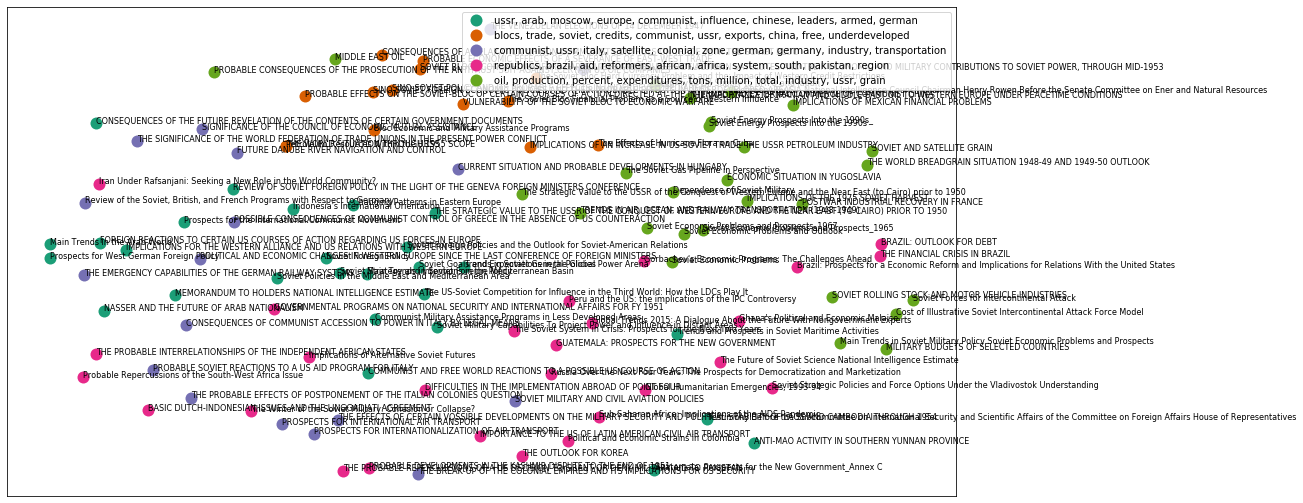

<Figure size 432x288 with 0 Axes>

In [49]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

plt.show()

#Saving the Fig
plt.savefig(os.path.join(outputs,'clusters_small_noaxes.png'), dpi=200)

A plotagem de cluster parece ótima, mas seria melhor sem rótulos sobrepostos. Nós vamos usar o D3.js (http://d3js.org/), um navegador baseado em / javascript interativo. Usaremos um wrapper matplotlib D3 chamado mpld3 (https://mpld3.github.io/). O Mpld3 basicamente permite que você use a sintaxe matplotlib para criar interativos da web. Ele tem uma API de alto nível realmente fácil que permite adicionar dicas ao passar o mouse.

Ele também possui algumas funcionalidades interessantes para aplicar zoom/panorâmica. O snippet javascript abaixo basicamente define um local personalizado para onde reside a alternância de zoom / panorâmica. Não se preocupe muito com isso e você realmente não precisa usá-lo, mas ajudou na formatação ao exportar para a Web posteriormente. A única coisa que você pode querer alterar é o atributo xey para a posição da barra de ferramentas.

In [50]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [64]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=cluster_names[name], mec='none', color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

In [ ]:
#uncomment the below to export to html
#os.chdir(outputs)
#html = mpld3.fig_to_html(fig)
#print(html)

#### 3.1.6 - Cluster hierárquico de documentos
[voltar](#3.1---Conte%C3%BAdo)

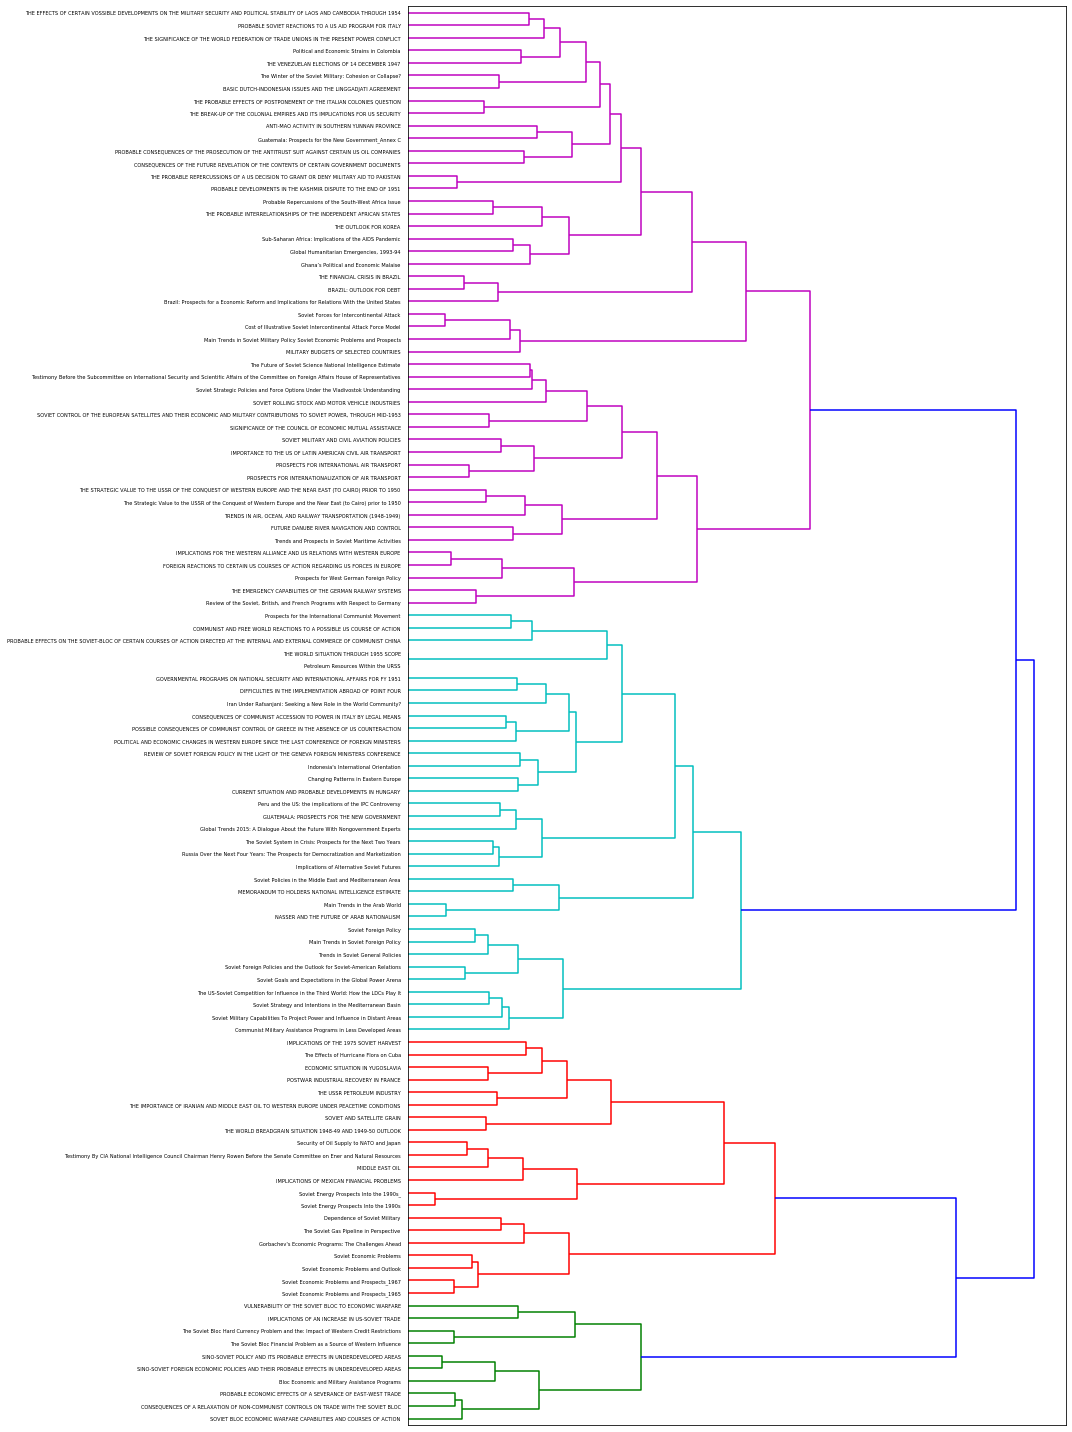

In [67]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.tight_layout() #show plot with tight layout
plt.savefig(os.path.join(outputs,'ward_clusters.png'), dpi=800)

#### 3.1.7 - Latent Dirichlet Allocation
[voltar](#3.1---Conte%C3%BAdo)

In [68]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [69]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [70]:
#Latent Dirichlet Allocation implementation with Gensim
from gensim import corpora, models, similarities 

#remove proper names
preprocess = [strip_proppers(doc) for doc in synopses]

%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 11.5 s, sys: 15.2 ms, total: 11.5 s
Wall time: 11.5 s
CPU times: user 1.68 s, sys: 0 ns, total: 1.68 s
Wall time: 1.68 s


In [71]:
#print(len([word for word in texts[0] if word not in stopwords]))
print(len(texts[0]))

2222


In [72]:
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=1, no_above=0.8)
corpus = [dictionary.doc2bow(text) for text in texts]

In [73]:
len(corpus)

113

In [74]:
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

CPU times: user 5min 53s, sys: 9.89 s, total: 6min 3s
Wall time: 3min 1s


In [75]:
print(lda[corpus[0]])

[(1, 0.108752914), (2, 0.890896)]


In [76]:
topics = lda.print_topics(5, num_words=15)

In [77]:
lda.show_topics()

[(0,
  '0.007*"aid" + 0.006*"africa" + 0.005*"region" + 0.005*"third" + 0.005*"global" + 0.004*"naval" + 0.004*"african" + 0.004*"south" + 0.004*"india" + 0.004*"conflict"'),
 (1,
  '0.009*"ussr" + 0.006*"communist" + 0.004*"europ" + 0.004*"leader" + 0.004*"influenc" + 0.003*"parti" + 0.003*"interest" + 0.003*"toward" + 0.003*"arab" + 0.003*"regim"'),
 (2,
  '0.014*"product" + 0.013*"oil" + 0.010*"ussr" + 0.009*"industri" + 0.009*"percent" + 0.007*"equip" + 0.006*"total" + 0.005*"energi" + 0.005*"export" + 0.005*"produc"'),
 (3,
  '0.023*"bloc" + 0.018*"ton" + 0.014*"trade" + 0.013*"million" + 0.013*"grain" + 0.011*"product" + 0.011*"total" + 0.009*"metric" + 0.006*"communist" + 0.006*"export"'),
 (4,
  '0.013*"civil" + 0.013*"airlin" + 0.011*"rout" + 0.011*"aviat" + 0.009*"servic" + 0.007*"transport" + 0.006*"aircraft" + 0.005*"american" + 0.005*"schedul" + 0.005*"de"')]

In [78]:
topics_matrix = lda.show_topics(formatted=False, num_words=15)

In [79]:
topics_matrix[1]

(1,
 [('ussr', 0.008896333),
  ('communist', 0.0059666233),
  ('europ', 0.003918555),
  ('leader', 0.0035949259),
  ('influenc', 0.0035435695),
  ('parti', 0.0034806933),
  ('interest', 0.0034519646),
  ('toward', 0.0032438466),
  ('arab', 0.003225912),
  ('regim', 0.0031070204),
  ('aid', 0.0029731924),
  ('war', 0.002895486),
  ('arm', 0.0026576016),
  ('bloc', 0.0026029898),
  ('trade', 0.0025805691)])

In [85]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

/home/heber/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.093555  0.066806       1        1  35.464565
2      0.098238  0.061523       2        1  33.688175
1      0.049148  0.031355       3        1  15.743777
0      0.009253 -0.207315       4        1  11.029137
3     -0.250194  0.047630       5        1   4.074341, topic_info=     Category         Freq     Term        Total  loglift  logprob
2184  Default  2186.000000  product  2186.000000  30.0000  30.0000
73    Default  1475.000000     bloc  1475.000000  29.0000  29.0000
4124  Default  1228.000000      ton  1228.000000  28.0000  28.0000
5902  Default   580.000000    civil   580.000000  27.0000  27.0000
7653  Default   451.000000   airlin   451.000000  26.0000  26.0000
...       ...          ...      ...          ...      ...      ...
1883   Topic5    35.573349  germani   451.707031   0.6590  -6.0326
682    Topic5    29.588329     best   151.595963   1.5666  -6.2168
711    Topic5    36.002007   capabl   592.691772   0.3994  -6.0206
233    Topic5    30.089525     free   225.232010   1.1875  -6.2000
2097   Topic5    30.374887   number   558.203979   0.2894  -6.1906

[382 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
15897      2  0.970327  10vrs
15898      2  0.955014   10yr
3478       1  0.987948  1990s
18759      5  0.946817   6-ss
18903      5  0.862431   9e/e
...      ...       ...    ...
587        5  0.010122    war
16584      3  0.991640   wftu
9315       1  0.996005  wheat
16142      2  0.968392    yel
20454      5  0.933190    zor

[872 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])